#**Hack-it! at OCBC: Final Assessment** 
**SUBMISSION BY:**




> Sanskar Sharma | B.Tech CSE | MIT Academy of Engineering, Alandi(D), Pune


> Contact number: +91 6261614589 | E-mail: sansskarsharma@gmail.com

##Exploratory Data Analysis of UK Traffic Data 2015


> Dataset used: https://www.kaggle.com/jboysen/us-traffic-2015





## **1. Drive Mounting (Only if using Colab/ColabPro)**

In [ ]:
import os
print("Current working directory before")
print(os.getcwd())

Current working directory before
/content/drive/My Drive/OCBC_Hack-it


In [ ]:
#Mount your drive on your desired drive folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change Path directory to the OCBC_Hack-it path's location
os.chdir('/content/drive/MyDrive/OCBC_Hack-it/')

## You're Good to go!

The dataset consisted of two .txt files in their archived format as **dot_traffic_2015.txt.gz** & **dot_traffic_station_2015.txt.gz.** Firstly, I extracted those files and then loaded the text files as pandas dataframe into the notebook. Naming conventions used in the Jupyter notebook for the two text files are as follows: traffic_df & traffic_station_df.

## **Details of the text files loaded as pandas dataframe are as follows:**

### **1.	Traffic_df:**
**Shape: (7140391,38)** It consisted of traffic count of each hour of each day of year 2015 for various states in US represented with their fips code, station ids, travel lane, functional classes, direction of travel etc.


### **2.	Traffic_station_df: (cross-referenced by station ids)**
**Shape: (28466,55)**
It consisted of deeper insights for each station their geographical coordinates, historical data, lanes & vehicle monitored for traffic, sensors involved, county fips codes, data retrieval methods, vehicle classification algorithms etc.
This data was rather more typical to deal with as it contained too many null values, repeated columns and large number of columns.


## **Required Intallations**

In [ ]:
!pip install numpy
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn
!apt-get -qq install -y graphviz && pip install -q pydot

## **2. Data Loading**

In [ ]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# set Jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# display warnings only the first time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# traffic station characteristics
traffic_station_df = pd.read_csv('US Traffic data/dot_traffic_stations_2015.txt',
                                 header=0, sep=',', quotechar='"')

# traffic volume metrics associated to each traffic station
traffic_df = pd.read_csv('US Traffic data/dot_traffic_2015.txt',
                         header=0, sep=',', quotechar='"')


In [ ]:
print(traffic_df.shape)
traffic_df.head()

(7140391, 38)


,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15
1,2015-09-26,26,7,7,West,21,1U,Urban: Principal Arterial - Interstate,2,9,3,NaN,056P94,381,252,218,194,220,348,453,679,826,962,1158,1379,1376,1383,1453,1617,1669,1308,1068,928,885,798,650,613,15
2,2015-06-16,16,3,3,East,6,1U,Urban: Principal Arterial - Interstate,0,6,3,NaN,077590,585,408,328,364,696,1929,4228,5634,5673,4636,3925,3827,4049,3954,4077,4244,4405,4609,4361,3272,2243,2050,1453,892,15
3,2015-04-26,26,1,5,South,55,1U,Urban: Principal Arterial - Interstate,1,4,3,NaN,450001,105,73,68,66,77,113,254,367,487,668,870,996,1003,1000,1043,1011,959,851,708,559,457,297,207,110,15
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,NaN,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15


In [ ]:
print(traffic_station_df.shape)
traffic_station_df.head()

(28466, 55)


,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,...,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,...,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


## **3. Data Cleaning & Handling**

> ### **a) Traffic Data**




Firstly, I assigned the names for the week days & months in a dictionary for better understanding for the data.

In [ ]:
#Converting the label encoded week and month column to strings/names for better understanding
day_of_week={
    1:"Sun",
    2:"Mon",
    3:"Tue",
    4:"Wed",
    5:"Thur",
    6:"Fri",
    7:"Sat"
}

months={
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"Jun",
    7:"Jul",
    8:"Aug",
    9:"Sep",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}

In [ ]:
#Dropped the unwanted (like restrictions, had all NAN values), repeated (like direction of travel & direction of travel name) and constant columns (like year is same for all 7.1M rows).
traffic_df.drop(columns=["restrictions","direction_of_travel","year_of_data","functional_classification","record_type","day_of_data"],inplace=True)

Converted the 24 hour formatted traffic count columns to 4 columns as:

**NMAE:
Night (00-06), Morning (06-12), Afternoon (12-18) and Evening (18-24) [as int type]**

And dropped the 24 hour format traffic count columns.


In [ ]:
#Converting 24 hour format to morning evening night afternoon format

In [ ]:
#l is the list of all columns on the traffic_df
l=traffic_df.columns
l

Index(['date', 'day_of_week', 'direction_of_travel_name', 'fips_state_code',
       'functional_classification_name', 'lane_of_travel', 'month_of_data',
       'station_id', 'traffic_volume_counted_after_0000_to_0100',
       'traffic_volume_counted_after_0100_to_0200',
       'traffic_volume_counted_after_0200_to_0300',
       'traffic_volume_counted_after_0300_to_0400',
       'traffic_volume_counted_after_0400_to_0500',
       'traffic_volume_counted_after_0500_to_0600',
       'traffic_volume_counted_after_0600_to_0700',
       'traffic_volume_counted_after_0700_to_0800',
       'traffic_volume_counted_after_0800_to_0900',
       'traffic_volume_counted_after_0900_to_1000',
       'traffic_volume_counted_after_1000_to_1100',
       'traffic_volume_counted_after_1100_to_1200',
       'traffic_volume_counted_after_1200_to_1300',
       'traffic_volume_counted_after_1300_to_1400',
       'traffic_volume_counted_after_1400_to_1500',
       'traffic_volume_counted_after_1500_to_1600',
 

In [ ]:
#Partitioning list from 8th index value to convert 24 hour bins to 4 bins of 6 hours each
l=l[8:]
night=l[:6]
morning=l[6:12]
afternoon=l[12:18]
evening=l[18:]

In [ ]:
#Displaying content of each bin
evening

Index(['traffic_volume_counted_after_1800_to_1900',
       'traffic_volume_counted_after_1900_to_2000',
       'traffic_volume_counted_after_2000_to_2100',
       'traffic_volume_counted_after_2100_to_2200',
       'traffic_volume_counted_after_2200_to_2300',
       'traffic_volume_counted_after_2300_to_2400'],
      dtype='object')

In [ ]:
#Mean of the 6 hours data into 1 bin of night, morning, afternoon and evening. 
traffic_df["traffic_volume_counted_night_perH"]=0
for i in night:
  traffic_df["traffic_volume_counted_night_perH"]+=traffic_df[i]
traffic_df["traffic_volume_counted_night_perH"]/=6
traffic_df["traffic_volume_counted_night_perH"]=np.round(traffic_df["traffic_volume_counted_night_perH"])

traffic_df["traffic_volume_counted_morning_perH"]=0
for i in l:
  if i not in morning:
    traffic_df["traffic_volume_counted_morning_perH"]+=traffic_df[i]
traffic_df["traffic_volume_counted_morning_perH"]/=6
traffic_df["traffic_volume_counted_morning_perH"]=np.round(traffic_df["traffic_volume_counted_morning_perH"])

traffic_df["traffic_volume_counted_afternoon_perH"]=0
for i in afternoon:
  traffic_df["traffic_volume_counted_afternoon_perH"]+=traffic_df[i]
traffic_df["traffic_volume_counted_afternoon_perH"]/=6
traffic_df["traffic_volume_counted_afternoon_perH"]=np.round(traffic_df["traffic_volume_counted_afternoon_perH"])

traffic_df["traffic_volume_counted_evening_perH"]=0
for i in l:
  if i not in evening:
    traffic_df["traffic_volume_counted_evening_perH"]+=traffic_df[i]
traffic_df["traffic_volume_counted_evening_perH"]/=6
traffic_df["traffic_volume_counted_evening_perH"]=np.round(traffic_df["traffic_volume_counted_evening_perH"])

In [ ]:
#Dropping the 24 hours binned columns
traffic_df.drop(columns=l,inplace=True)

In [ ]:
#traffic_df updated display
print(traffic_df.shape)
traffic_df.head()

(7140391, 12)


,date,day_of_week,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
0,2015-04-07,3,North,56,Rural: Principal Arterial - Other,1,4,000084,22.0,200.0,128.0,291.0
1,2015-09-26,7,West,21,Urban: Principal Arterial - Interstate,2,9,056P94,269.0,2560.0,1468.0,2646.0
2,2015-06-16,3,East,6,Urban: Principal Arterial - Interstate,0,6,077590,718.0,7320.0,4223.0,9595.0
3,2015-04-26,1,South,55,Urban: Principal Arterial - Interstate,1,4,450001,84.0,1451.0,978.0,1668.0
4,2015-05-23,7,East,4,Rural: Minor Arterial,0,5,102210,4.0,104.0,79.0,146.0


In [ ]:
#displaying the datatype of each column
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 12 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   date                                   object 
 1   day_of_week                            int64  
 2   direction_of_travel_name               object 
 3   fips_state_code                        int64  
 4   functional_classification_name         object 
 5   lane_of_travel                         int64  
 6   month_of_data                          int64  
 7   station_id                             object 
 8   traffic_volume_counted_night_perH      float64
 9   traffic_volume_counted_morning_perH    float64
 10  traffic_volume_counted_afternoon_perH  float64
 11  traffic_volume_counted_evening_perH    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 653.7+ MB


In [ ]:
#type conversion of each bin per hour traffic count from float64 to int
traffic_df["traffic_volume_counted_night_perH"]=traffic_df["traffic_volume_counted_night_perH"].astype(int)
traffic_df["traffic_volume_counted_morning_perH"]=traffic_df["traffic_volume_counted_morning_perH"].astype(int)
traffic_df["traffic_volume_counted_afternoon_perH"]=traffic_df["traffic_volume_counted_afternoon_perH"].astype(int)
traffic_df["traffic_volume_counted_evening_perH"]=traffic_df["traffic_volume_counted_evening_perH"].astype(int)

In [ ]:
#The four section binned format (NMAE) contained outliers as 75% of the data was about approx. 
#1/1000th time of the maximum traffic count. Hence, rows with NMAE values greater than 10k were dropped.
traffic_df.describe()

,day_of_week,fips_state_code,lane_of_travel,month_of_data,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
count,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06,7.140391e+06
mean,4.013872e+00,2.966967e+01,1.291672e+00,6.520263e+00,1.153841e+02,1.206392e+03,7.163230e+02,1.390691e+03
std,1.997511e+00,1.670612e+01,1.080419e+00,3.455234e+00,2.713415e+02,1.970304e+03,1.063541e+03,2.118435e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,1.500000e+01,2.710000e+02,1.760000e+02,3.240000e+02
50%,4.000000e+00,3.000000e+01,1.000000e+00,7.000000e+00,4.400000e+01,6.710000e+02,4.230000e+02,7.850000e+02
75%,6.000000e+00,4.400000e+01,2.000000e+00,1.000000e+01,1.260000e+02,1.415000e+03,8.520000e+02,1.630000e+03
max,7.000000e+00,5.600000e+01,9.000000e+00,1.200000e+01,7.060500e+04,2.034420e+05,9.310000e+04,1.886170e+05


In [ ]:
#Removing outliers from the dataset
traffic_df=traffic_df.loc[(traffic_df["traffic_volume_counted_night_perH"]<10000)&(traffic_df["traffic_volume_counted_morning_perH"]<10000)&(traffic_df["traffic_volume_counted_afternoon_perH"]<10000)&(traffic_df["traffic_volume_counted_evening_perH"]<10000)]

In [ ]:
#New decription of the traffic_df
traffic_df.describe()

,day_of_week,fips_state_code,lane_of_travel,month_of_data,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
count,7.034333e+06,7.034333e+06,7.034333e+06,7.034333e+06,7.034333e+06,7.034333e+06,7.034333e+06,7.034333e+06
mean,4.011641e+00,2.984035e+01,1.310870e+00,6.520529e+00,9.520047e+01,1.044564e+03,6.299066e+02,1.208662e+03
std,2.000615e+00,1.662541e+01,1.076814e+00,3.455988e+00,1.436518e+02,1.245001e+03,7.225409e+02,1.419609e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.000000e+00,1.300000e+01,1.000000e+00,4.000000e+00,1.500000e+01,2.660000e+02,1.730000e+02,3.180000e+02
50%,4.000000e+00,3.000000e+01,1.000000e+00,7.000000e+00,4.200000e+01,6.560000e+02,4.140000e+02,7.680000e+02
75%,6.000000e+00,4.400000e+01,2.000000e+00,1.000000e+01,1.200000e+02,1.364000e+03,8.240000e+02,1.572000e+03
max,7.000000e+00,5.600000e+01,9.000000e+00,1.200000e+01,8.268000e+03,9.999000e+03,8.715000e+03,9.999000e+03


In [ ]:
#traffic_df updated display
traffic_df.head()

,date,day_of_week,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
0,2015-04-07,3,North,56,Rural: Principal Arterial - Other,1,4,000084,22,200,128,291
1,2015-09-26,7,West,21,Urban: Principal Arterial - Interstate,2,9,056P94,269,2560,1468,2646
2,2015-06-16,3,East,6,Urban: Principal Arterial - Interstate,0,6,077590,718,7320,4223,9595
3,2015-04-26,1,South,55,Urban: Principal Arterial - Interstate,1,4,450001,84,1451,978,1668
4,2015-05-23,7,East,4,Rural: Minor Arterial,0,5,102210,4,104,79,146




>  ### **b) Traffic Station Data**



Operations done:

 

*   Firstly, dropped the unwanted, repeated and constant columns from dataframe.st item
* Dropped the columns which contained null values more than 20k as the dataset contains 28k rows. Hence removed columns with 70% above null values.
* Only taken station ids which are present in traffic_df and removed station ids which are not in traffic_df. 
* Binary Encoded the following columns as 0 and 1:
hpms sample type, national highway system and sample type for vehicle classification


	

**New shape of traffic_station_df:** (24275,15)


In [ ]:
#traffic_station_df updated display
print(traffic_station_df.shape)
traffic_station_df.head()

(28466, 55)


,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,...,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
2,G,Axle spacing with Scheme F modified,NaN,NaN,15,1,005,1,North,93,6,1R,Rural: Principal Arterial - Interstate,NaN,N,2,Other lanes,41.441777,122.435010,00000000005R,750293.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,2,2,0,2,1,005,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,H,Station used for Heavy Vehicle Travel Informat...,N,NaN,022940,EDGEWOOD SIS5R22.999,P,Piezoelectric,15,0,69
3,D,Vehicle length classification,M,Moving average of the steering axle of 3S2s,13,0,NaN,5,South,35,49,1U,Urban: Principal Arterial - Interstate,A00015293910,Y,1,Outside (rightmost) lane,40.516500,111.891520,000000001500,290600.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),...,5,5,5,5,1,15,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,B,Station used for TMG sample and Strategic High...,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000302,I 15 12900 South M.P. 290.6,X,Radio wave,15,0,11
4,G,Axle spacing with Scheme F modified,0,NaN,14,1,000000,7,West,27,34,1U,Urban: Principal Arterial - Interstate,NaN,N,4,Other lanes,40.892373,74.484206,NaN,NaN,2,Automated (telemetry),2,Portable traffic recording device,...,4,4,4,4,1,000080,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,W01136,E. of Franklin Rd Underpass,L,Inductance loop,15,0,95


In [ ]:
#Checking null values of each column
traffic_station_df.isna().sum()

algorithm_of_vehicle_classification                  9890
algorithm_of_vehicle_classification_name            11131
calibration_of_weighing_system                      20301
calibration_of_weighing_system_name                 21785
classification_system_for_vehicle_classification        0
concurrent_route_signing                                0
concurrent_signed_route_number                      14874
direction_of_travel                                     0
direction_of_travel_name                                0
fips_county_code                                        0
fips_state_code                                         0
functional_classification                               0
functional_classification_name                          0
hpms_sample_identifier                              15248
hpms_sample_type                                        0
lane_of_travel                                          0
lane_of_travel_name                                     0
latitude      

In [ ]:
#This dataset will only be used for modelling pupose, hence remocing the unwanted columns
traffic_station_df.drop(
    columns=["algorithm_of_vehicle_classification","direction_of_travel",
             "direction_of_travel_name","functional_classification",
             "functional_classification_name","hpms_sample_identifier",
             "lane_of_travel","lrs_identification","lrs_location_point",
             "method_of_traffic_volume_counting","method_of_data_retrieval",
             "method_of_truck_weighing","method_of_vehicle_classification","posted_route_signing",
             "posted_signed_route_number","primary_purpose","sample_type_for_traffic_volume",
             "sample_type_for_truck_weight","sample_type_for_vehicle_classification_name","second_type_of_sensor","type_of_sensor",
             "year_of_data","year_station_discontinued","classification_system_for_vehicle_classification","algorithm_of_vehicle_classification_name",
             "method_of_vehicle_classification_name","number_of_lanes_monitored_for_truck_weight","number_of_lanes_monitored_for_vehicle_class","record_type",
             "sample_type_for_truck_weight_name","year_station_established",""
             "concurrent_signed_route_number","fips_county_code","primary_purpose_name","sample_type_for_traffic_volume_name"],inplace=True)

In [ ]:
#Drop columns with null values more than 20k
for i in traffic_station_df.columns:
  if traffic_station_df[i].isna().sum()>20000:
    traffic_station_df.drop(columns=[i],inplace=True)

In [ ]:
#There are extra station_ids in traffic_station_df hence considering only common station_ids
traffic_station_df=traffic_station_df[traffic_station_df["station_id"].isin(traffic_df["station_id"].unique())]

In [ ]:
#traffic_station_df updated display
print(traffic_station_df.shape)
traffic_station_df.head()

(24275, 15)


,concurrent_route_signing,fips_state_code,hpms_sample_type,lane_of_travel_name,latitude,longitude,method_of_data_retrieval_name,method_of_traffic_volume_counting_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,sample_type_for_vehicle_classification,station_id,station_location,type_of_sensor_name
2,1,6,N,Other lanes,41.441777,122.435010,Automated (telemetry),Permanent automatic traffic recorder (ATR),Y,2,2,H,022940,EDGEWOOD SIS5R22.999,Piezoelectric
3,0,49,Y,Outside (rightmost) lane,40.516500,111.891520,Automated (telemetry),Permanent automatic traffic recorder (ATR),Y,5,5,N,000302,I 15 12900 South M.P. 290.6,Radio wave
4,1,34,N,Other lanes,40.892373,74.484206,Automated (telemetry),Portable traffic recording device,Y,4,4,N,W01136,E. of Franklin Rd Underpass,Inductance loop
5,0,16,Y,Outside (rightmost) lane,43.599300,116.558919,Automated (telemetry),Permanent automatic traffic recorder (ATR),Y,2,2,N,000276,I-84 300 Ft. W of Beg EB Off,Inductance loop
6,0,28,N,Outside (rightmost) lane,32.348988,90.245834,Automated (telemetry),Permanent automatic traffic recorder (ATR),Y,2,2,H,252560,AVC 222 - 0.5 mi N of Industri,Piezoelectric


In [ ]:
#Binary encoding for two valued variables
traffic_station_df.replace({'hpms_sample_type': {"N": 0, "Y": 1}},inplace=True)
traffic_station_df.replace({'national_highway_system': {"N": 0, "Y": 1}},inplace=True)

In [ ]:
#Renaming a column for easy understanding and binary encoding it
traffic_station_df.rename(columns={"sample_type_for_vehicle_classification":"Station_used_for_Heavy_Vehicle"},inplace=True)
traffic_station_df.replace({'Station_used_for_Heavy_Vehicle': {"N": 0, "H": 1}},inplace=True)

## **4. Data Visualization and Analysis**

**Note: Only the Traffic_df is used for Explorary Data Analysis**

---

### **Pattern/Trend: 1**



In [ ]:
#Maximum and Minimum traffic count at different time intervals for all states
pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['fips_state_code'],
                     aggfunc=[min,max]).head()

min  \
                traffic_volume_counted_afternoon_perH   
fips_state_code                                         
1                                                   0   
2                                                   0   
4                                                   0   
5                                                   0   
6                                                   0   

                                                     \
                traffic_volume_counted_evening_perH   
fips_state_code                                       
1                                                 0   
2                                                 0   
4                                                 0   
5                                                 0   
6                                                 0   

                                                     \
                traffic_volume_counted_morning_perH   
fips_state_code                                       
1                                                 0   
2                                                 0   
4                                                 0   
5                                                 0   
6                                                 0   

                                                   \
                traffic_volume_counted_night_perH   
fips_state_code                                     
1                                               0   
2                                               0   
4                                               0   
5                                               0   
6                                               0   

                                                  max  \
                traffic_volume_counted_afternoon_perH   
fips_state_code                                         
1                                                2450   
2                                                1409   
4                                                6559   
5                                                1626   
6                                                6623   

                                                     \
                traffic_volume_counted_evening_perH   
fips_state_code                                       
1                                              5407   
2                                              5713   
4                                              9999   
5                                              3495   
6                                              9999   

                                                     \
                traffic_volume_counted_morning_perH   
fips_state_code                                       
1                                              4390   
2                                              5685   
4                                              9998   
5                                              3104   
6                                              9998   

                                                   
                traffic_volume_counted_night_perH  
fips_state_code                                    
1                                            1876  
2                                            3470  
4                                            2917  
5                                             590  
6                                            4803

In [ ]:
#Fips state codes wise traffic: (51 fips state codes till 2015)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['fips_state_code'],
                     aggfunc=np.mean)
table.head()

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
fips_state_code,,,,
1,544.145661,1056.538155,904.568358,91.303816
2,269.799329,474.134098,432.235385,27.991489
4,1487.912091,2927.335996,2563.930702,285.454176
5,294.923137,559.605751,481.444212,45.503778
6,1304.963226,2535.059377,2221.768774,230.243944


Visual ineference for the above table


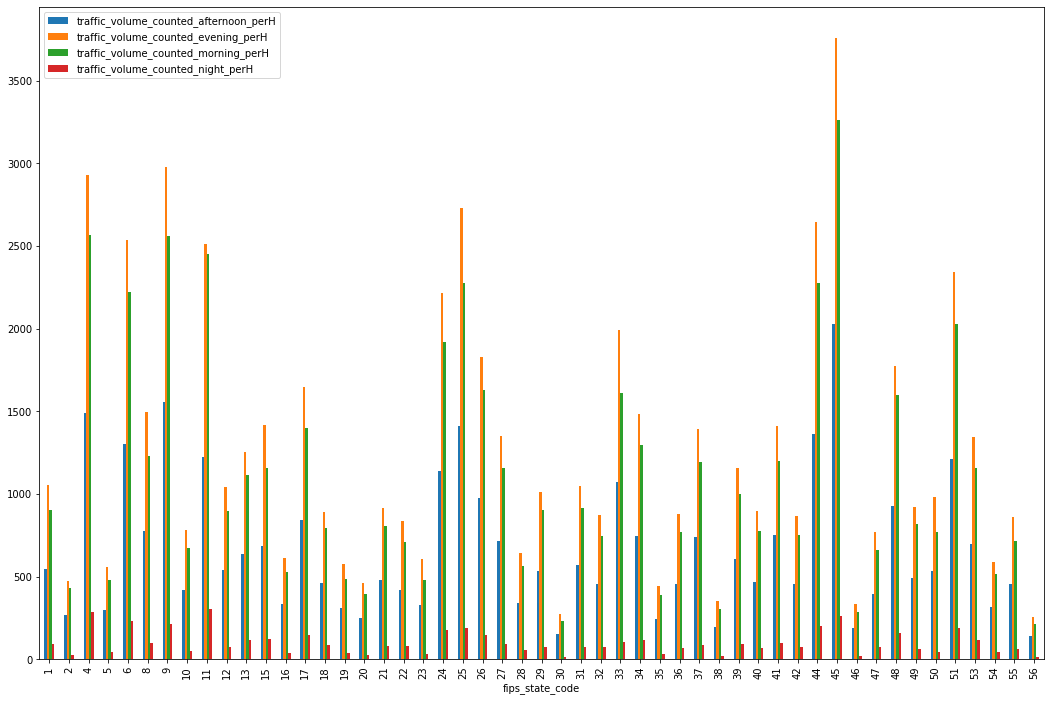

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12),kind='bar')





**Observation: 1.1**

Pivot table, plot and heatmap on fips state code and NMAE columns resulted that the maximum mean traffic states are 45>9>4 with maximum mean traffic in evening (3.8k)>morning (3.3k)>afternoon (2k) > night (260) for state with code 45. 
Whereas, minimum mean traffic states are 56<30 with minimum mean traffic in night (15)< afternoon (140)< morning (210)< evening (260) for state with code 56


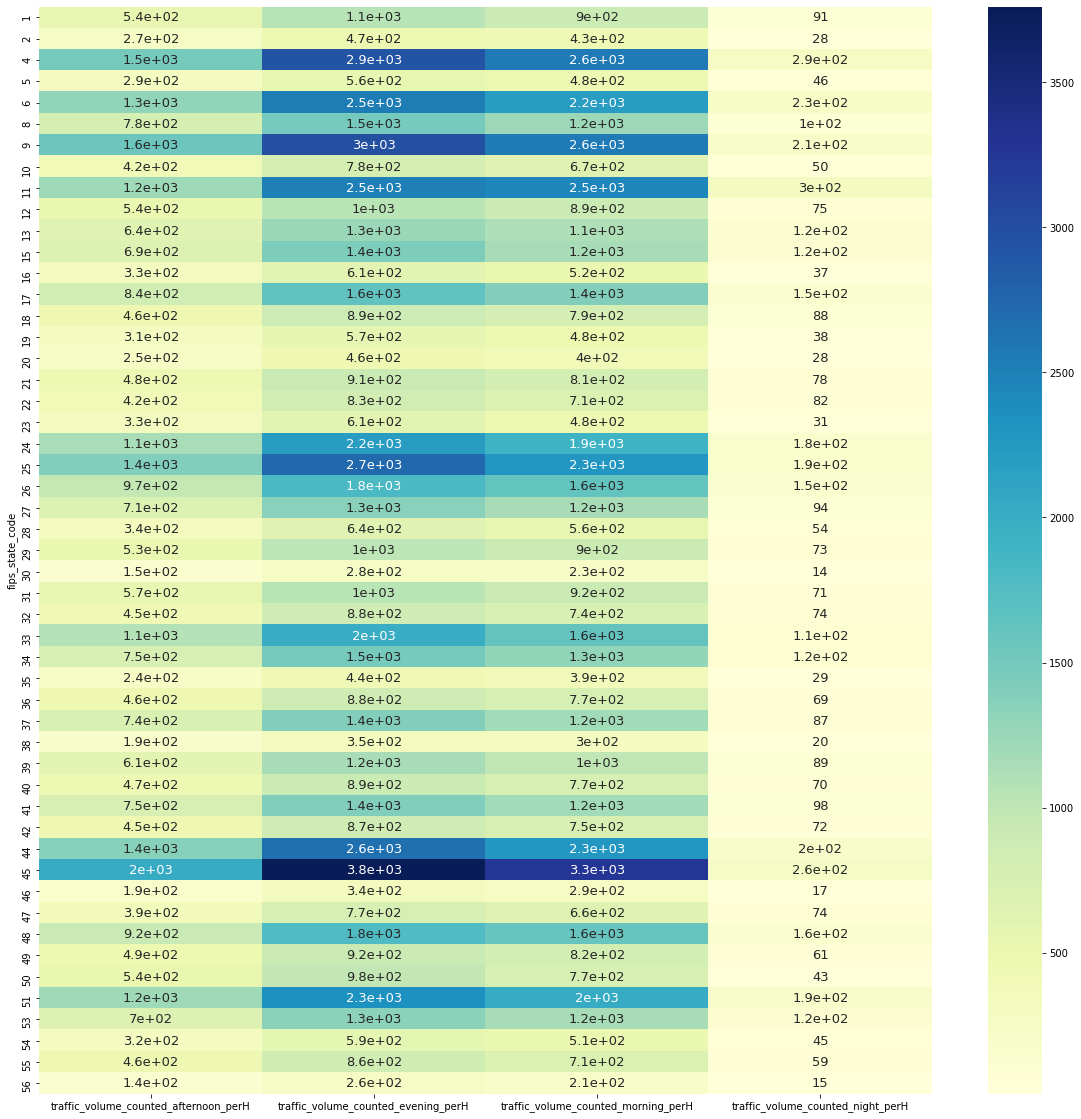

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

**Inference: 1.1** 

45, 9 and 4 are the heavy traffic states in US for the year 2015, whereas 56 and 30 are the states where there’s no traffic at all. 






In [ ]:
#Station Id wise traffic: (5k station ids)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['station_id'],
                     aggfunc=np.mean)
table.sort_values(["traffic_volume_counted_evening_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_night_perH"],ascending=False,inplace=True)

In [ ]:
#station ids with 10 most mean traffic count per hour
table.head(10)

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
station_id,,,,
071200,5470.000000,9934.000000,9720.000000,1002.000000
119780,5434.000000,9776.500000,9253.500000,908.500000
100093,5106.400000,9571.900000,9797.500000,1365.400000
070300,5060.714286,9536.000000,9669.142857,1028.714286
100117,5284.172414,9439.551724,9421.103448,1003.275862
100118,5234.984615,9334.538462,9153.907692,946.492308
100105,3842.000000,9318.000000,7619.000000,1677.000000
071280,5068.083333,9310.500000,9494.333333,924.083333
101879,4993.482759,9281.344828,9028.068966,1005.068966


**Observation: 1.2**

Pivot table, plot and heatmap on station ids and NMAE columns resulted that the maximum mean traffic station ids are 071200>119780>10093 with maximum mean traffic in evening (9934)>morning (9720)>afternoon (5470) > night (1002) for station with id 071200. 


In [ ]:
#station ids with 10 least traffic count per hour
table.tail(10)

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
station_id,,,,
001007,8.425714,15.674286,12.180000,0.492857
011004,6.972603,12.916438,9.094521,0.060274
781230,5.648199,11.185596,10.518006,1.481994
0131SE,4.627273,9.424242,6.995455,0.637879
K10500,3.702703,7.162162,4.993994,0.064565
K20800,3.344681,6.451064,4.227660,0.236170
P32AAA,1.483562,3.012329,1.928767,0.173973
000599,0.208448,0.359963,0.275023,0.042700
000441,0.000000,0.000000,0.000000,0.000000


Whereas, minimum mean traffic station ids 00041 and 075040 have observed no traffic at all for the year 2015.

**Inference: 1.2** 

The station with 017200, 119780 and 10093 ids have recorded highest mean traffic in US for the year 2015, whereas stations ids 00041 and 075040 appears to be have no habit at all.

---

### **Pattern/ Trend: 2**


In [ ]:
#Mean traffic count per hour over the year 2015 at night, morning, afternoon and evening
mean_traffic_perHour=[round(traffic_df["traffic_volume_counted_night_perH"].mean()),
                      round(traffic_df["traffic_volume_counted_morning_perH"].mean()),
                      round(traffic_df["traffic_volume_counted_afternoon_perH"].mean()),
                      round(traffic_df["traffic_volume_counted_evening_perH"].mean())]
print("Night traffic per hour over the complete year: ",mean_traffic_perHour[0])
print("Morning traffic per hour over the complete year: ",mean_traffic_perHour[1])
print("Afternoon traffic per hour over the complete year: ",mean_traffic_perHour[2])
print("Evening traffic per hour over the complete year: ",mean_traffic_perHour[3])


Night traffic per hour over the complete year:  95
Morning traffic per hour over the complete year:  1045
Afternoon traffic per hour over the complete year:  630
Evening traffic per hour over the complete year:  1209


<BarContainer object of 4 artists>

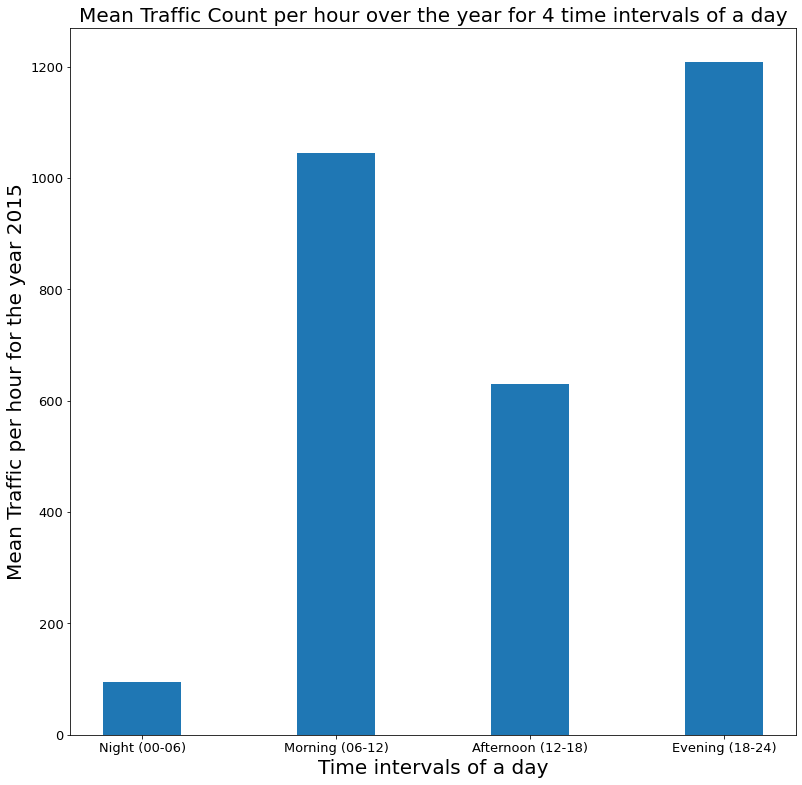

In [ ]:
fig = plt.figure(figsize = (13, 13))
 
plt.title("Mean Traffic Count per hour over the year for 4 time intervals of a day",fontdict={"fontsize":20})

plt.xlabel("Time intervals of a day",fontdict={"fontsize":20})
plt.ylabel("Mean Traffic per hour for the year 2015",fontdict={"fontsize":20})

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
# creating the bar plot for the above
plt.bar(["Night (00-06)","Morning (06-12)","Afternoon (12-18)","Evening (18-24)"], mean_traffic_perHour, 
        width = 0.4)

**Inference:**

It is observed that US have heaviest traffic in the evening (18-24 Hr) and lightest traffic is obtained at night (00-06 Hr) for the year 2015. Morning mean traffic is second heaviest among four. 
General trend in mean traffic reduction of a day for year 2015: 
Evening > Morning > Afternoon > Night 
It can be justified as Office workers, students, daily wage workers etc. returns home in the evening and usually plans to go out then, resulting in heavy evening traffic, morning traffic is accounted by the rush to go to school, offices and for work and usually its bedtime at night resulting in least traffic due to 24x7 transportation services in US.




---
### **Pattern/ Trend: 3**


In [ ]:
#Day of week wise traffic: (7 days)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['day_of_week'],
                     aggfunc=np.mean)
table

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
day_of_week,,,,
1,610.550689,1033.987401,1007.146760,82.533028
2,620.576995,1232.086581,998.903343,95.255346
3,618.228625,1238.287431,1010.182244,97.136238
4,628.324058,1254.089129,1032.780541,98.554062
5,636.316252,1256.546156,1058.359492,99.979346
6,688.791359,1316.896137,1162.674397,99.836400
7,606.612112,1129.023329,1041.153768,93.042968


**Observation:**

Pivot table, plot and heatmap on day of week and NMAE columns resulted that the maximum mean traffic weekday is Saturday with maximum mean traffic in evening (1.3k)>morning (1.2k)>afternoon (690) > night (100).
Whereas, minimum mean traffic weekdays are Monday & Sunday.


Visual ineference for the above table


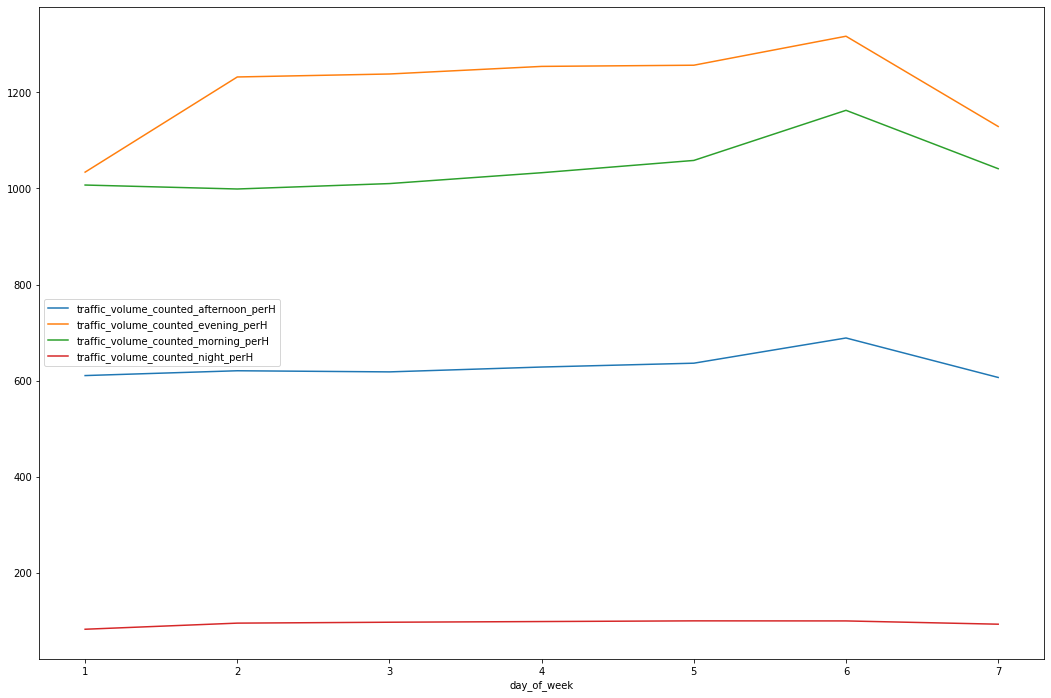

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

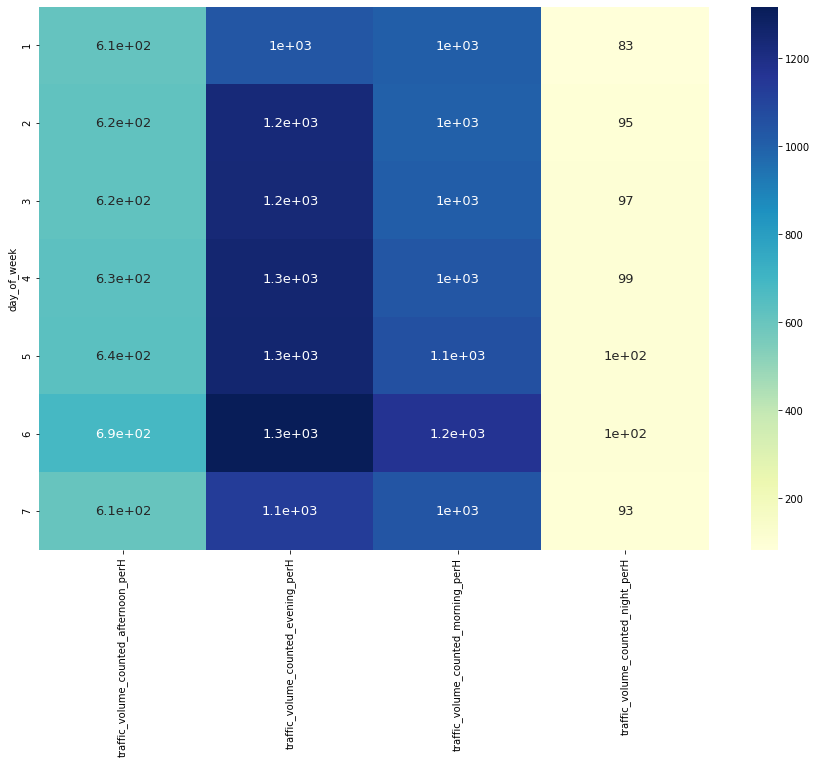

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

**Inference:** 

Saturdays in US are found to be extreme heavy traffic day than other days except for night time.
General trend in traffic for a week is:
It increases from Monday reaches its extreme count on Saturday and then drops nearer to Monday’s traffic on Sunday. 
It can be explained as Saturday and Sunday are the weekends and as Saturday being the first people generally plan this day for some outing, shopping and personal amusements resulting in more traffic while they in general choose to rest at home on Sunday.


---

### **Pattern/ Trend: 4**


In [ ]:
#Month wise traffic: (12 months)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['month_of_data'],
                     aggfunc=np.mean)
table

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
month_of_data,,,,
1,585.831257,1106.446071,952.154139,85.353595
2,582.446757,1110.589643,951.164269,84.629505
3,620.206474,1187.613155,1023.822540,92.420256
4,631.310153,1216.789587,1048.493980,94.043863
5,648.936849,1244.772878,1088.794081,97.786697
6,644.959483,1250.286381,1083.865826,100.334044
7,663.061877,1279.251202,1123.171040,104.670886
8,655.009313,1259.792697,1101.034001,101.483932
9,636.029346,1231.005730,1059.269190,97.121114


**Observation:**

Pivot table, plot and heatmap on months and NMAE columns resulted that the maximum mean traffic month is July with maximum mean traffic in evening (1.3k)>morning (1.1k)>afternoon (660) > night (100).
Whereas, minimum mean traffic months are January and February. 


Visual ineference for the above table


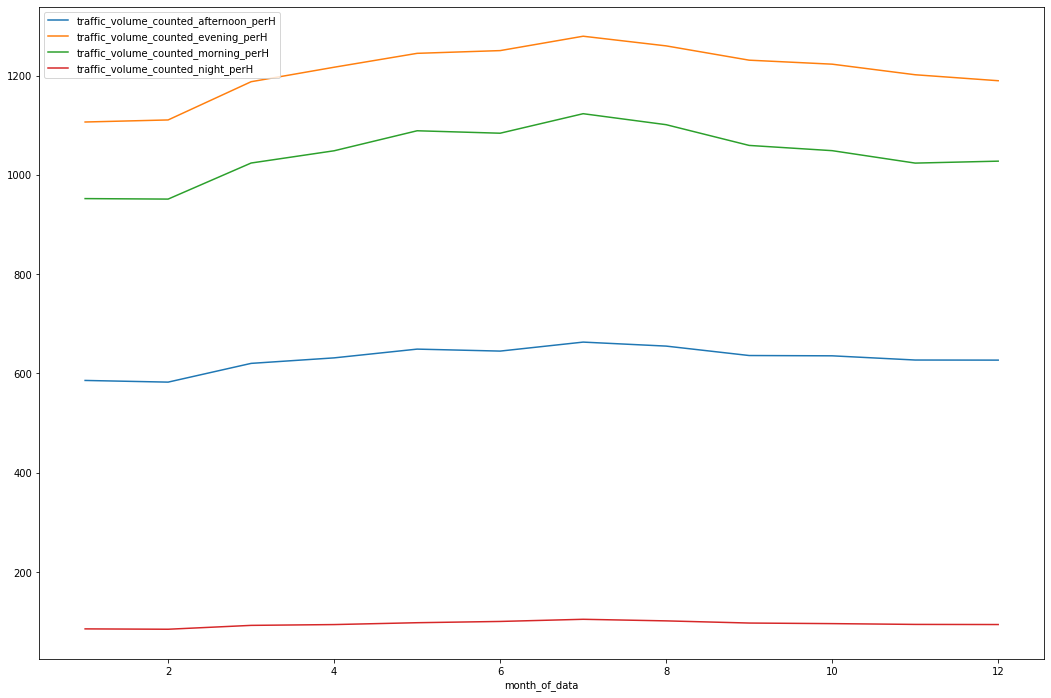

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

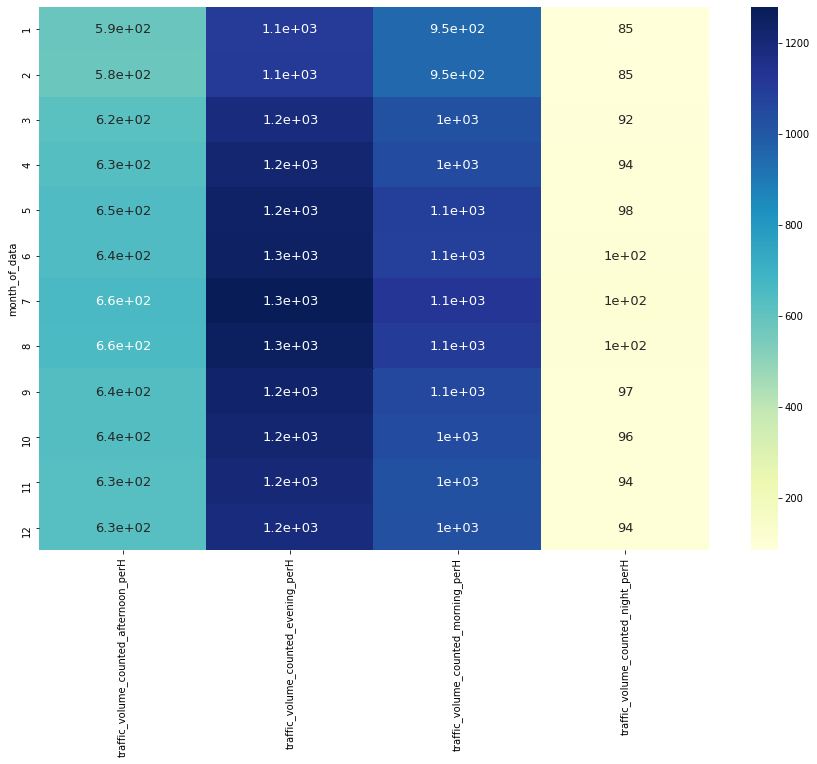

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

**Inference**: 

There’s a monthly parabolic trend observed in traffic for the complete year 2015 in US. January and February are months with lightest and almost equal traffic. The traffic increases after February and Reaches its extreme count in month of July (being heaviest traffic month) and then starts decreasing gradually till December except for night time (least noticeable parabola)

It can be justified as in US Jan and Feb are the months when its snows blocking almost most of the lanes and routes. Also, people avoids travelling in the snowy season which explains the least traffic in these months. The parabola is due to the seasoning in US. As it is a colder place with its summer season close to June and July and people there prefer this weather to travel and celebrate and what not resulting it to be heaviest traffic month. 

---

### **Additional Pattern/ Trend:**


In [ ]:
#Direction of travel and traffic: (10 travel directions)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['direction_of_travel_name'],
                     aggfunc=np.mean)
table

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
direction_of_travel_name,,,,
East,586.864492,1129.643559,976.169998,89.849590
East-West or Southeast-Northwest combined (ATR stations only),1318.988486,2434.490369,2094.111729,159.953519
North,653.472904,1254.574224,1086.501865,99.949152
North-South or Northeast-Southwest combined (ATR stations only),1447.085235,2685.972393,2253.244765,165.906587
Northeast,453.495568,836.672589,713.534355,50.626021
Northwest,421.443662,791.670779,657.544987,45.321013
South,643.155349,1237.241775,1069.719938,98.723223
Southeast,419.232264,797.930398,656.225629,49.457719
Southwest,448.880124,869.444779,716.334808,58.825627


**Conventions: N-North, E-East, W-West, S-South**

**Observation:**

Pivot table, plot and heatmap on directions of travel and NMAE columns resulted that the maximum mean traffic directions are North-South or Northeast-Southwest (N-S or NE-SW) > East-West or Southeast-Northwest (E-W or SE-NW) with maximum mean traffic in evening (2.7k)>morning (2.3k)>afternoon (1.4k) > night (170).
Whereas, Northeast and Northwest are the directions with least mean traffic.


Visual ineference for the above table


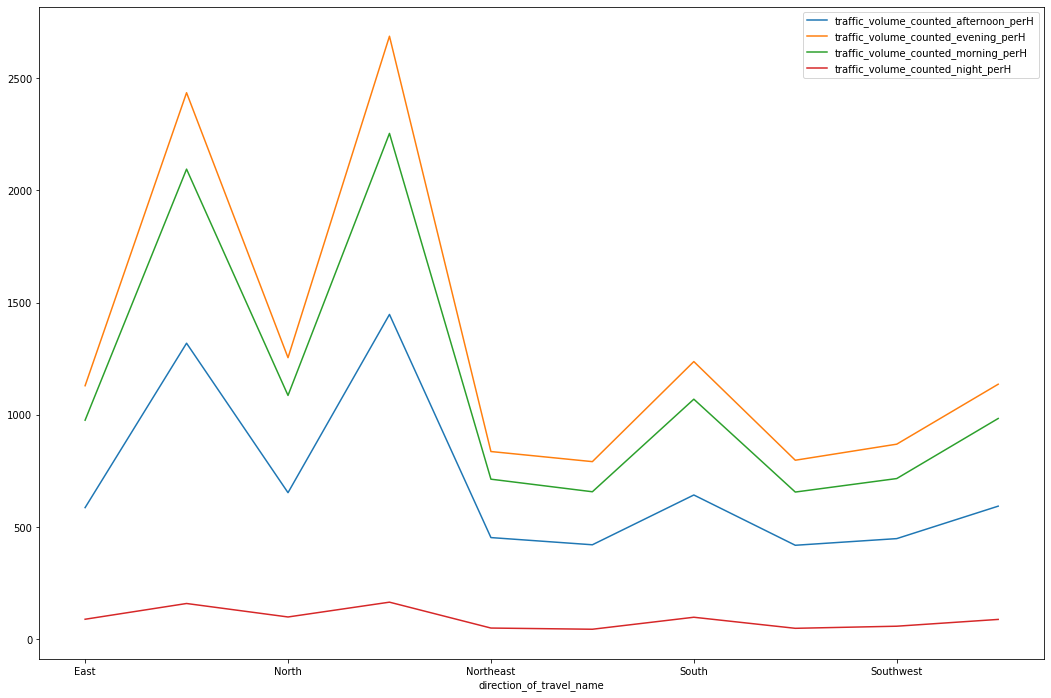

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

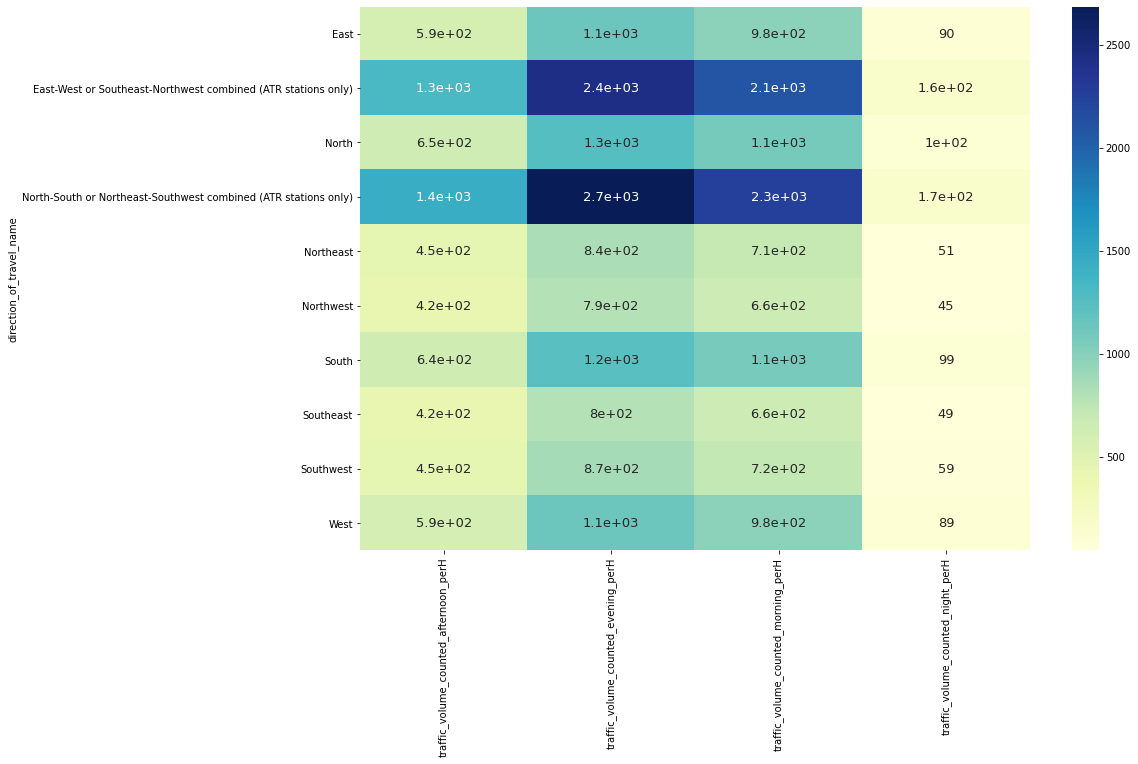

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

**Inference:** 

The N-S or NE-SW, E-W or SE-NW directions of various stations and states are found to have heavy traffic in US whereas NE and NW are the lowest traffic directions in general. 

---
### **Additional Pattern/ Trend:**



In [ ]:
#Lane of travel and traffic: (10 travel lanes)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['lane_of_travel'],
                     aggfunc=np.mean)
table

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
lane_of_travel,,,,
0,1144.744596,2194.398734,1898.468727,174.771101
1,386.225726,744.783740,644.623996,61.280186
2,492.304425,935.830006,810.153395,71.091058
3,769.990230,1480.600136,1270.432688,107.670225
4,802.122989,1561.982612,1330.509178,117.007048
5,880.230296,1736.144662,1502.288395,144.366913
6,795.237291,1534.620738,1326.356313,105.151423
7,553.054242,1113.135363,919.640868,82.002753
8,1196.774586,2027.620994,1966.961326,148.270718


**Observation:**

Pivot table, plot and heatmap on lanes of travel and NMAE columns resulted that the maximum mean traffic lanes are 0th >8th >5th  with maximum mean traffic in evening (2.2k)>morning (1.9k)>afternoon (1.1k) > night (170) for the 0th lane.
Whereas, minimum mean traffic lanes are 9th <1st <2nd  with minimum mean traffic in night (18)< afternoon (270)< evening (370)< morning (380) for 9th lane.


Visual ineference for the above table


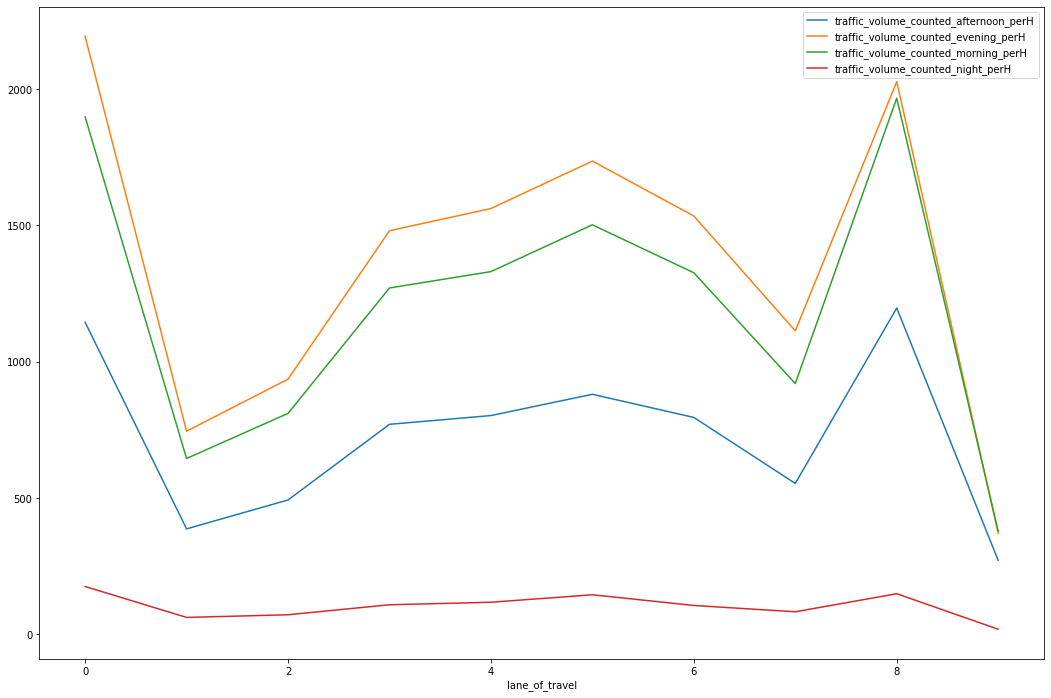

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

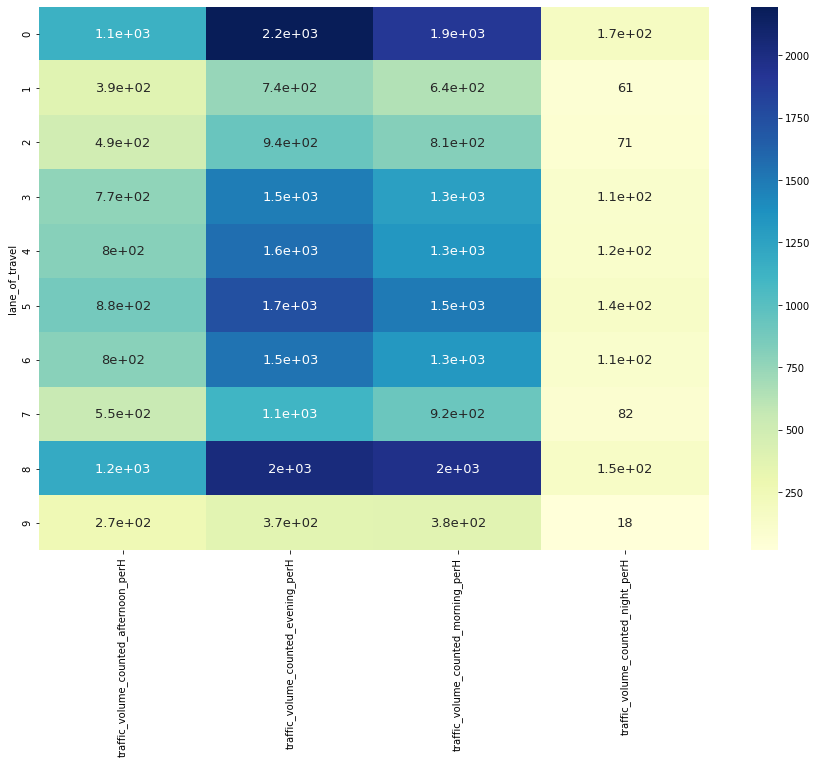

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

**Inference:** 

The 0th, 8th and 5th lanes for travelling are heavy traffic lanes whereas the 9th, 1st and 2nd lanes are better for a traveller to take as they have least traffic on them across US.

---
### **Additional Pattern/ Trend:**



In [ ]:
#Functional Classification and traffic: (12 functional classes)
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=['functional_classification_name'],
                     aggfunc=np.mean)
table

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
functional_classification_name,,,,
Rural: Local System,63.593572,114.143468,89.529419,3.951788
Rural: Major Collector,126.500252,231.965270,195.429197,13.131852
Rural: Minor Arterial,174.850982,325.075352,267.578642,19.236180
Rural: Minor Collector,118.031998,221.682877,184.243288,13.606615
Rural: Principal Arterial - Interstate,656.045195,1246.721653,1102.015937,114.177820
Rural: Principal Arterial - Other,272.139026,508.301870,426.142568,34.241782
Urban: Collector,224.382268,400.188238,352.122448,20.779824
Urban: Local System,166.362616,299.798578,263.939096,16.769296
Urban: Minor Arterial,346.818557,631.436338,544.919175,34.259294


**These are the various urban and rural area divisions in US.**

**Observation:**

Pivot table, plot and heatmap on functional classes and NMAE columns resulted that the maximum mean traffic regions are Urban: Principal Arterial(PA) - Interstate > Urban: Principal Arterial(PA) – Other Freeways and Expressways with maximum mean traffic in evening (2.3k)>morning (2k)>afternoon (1.2k) > night (200) for Urban: PA-Interstate.
Whereas, minimum mean traffic regions are Rural: Local System (LS) < Rural: Major Collector (MC) < Rural: Minor Arterial (MA).


Visual ineference for the above table


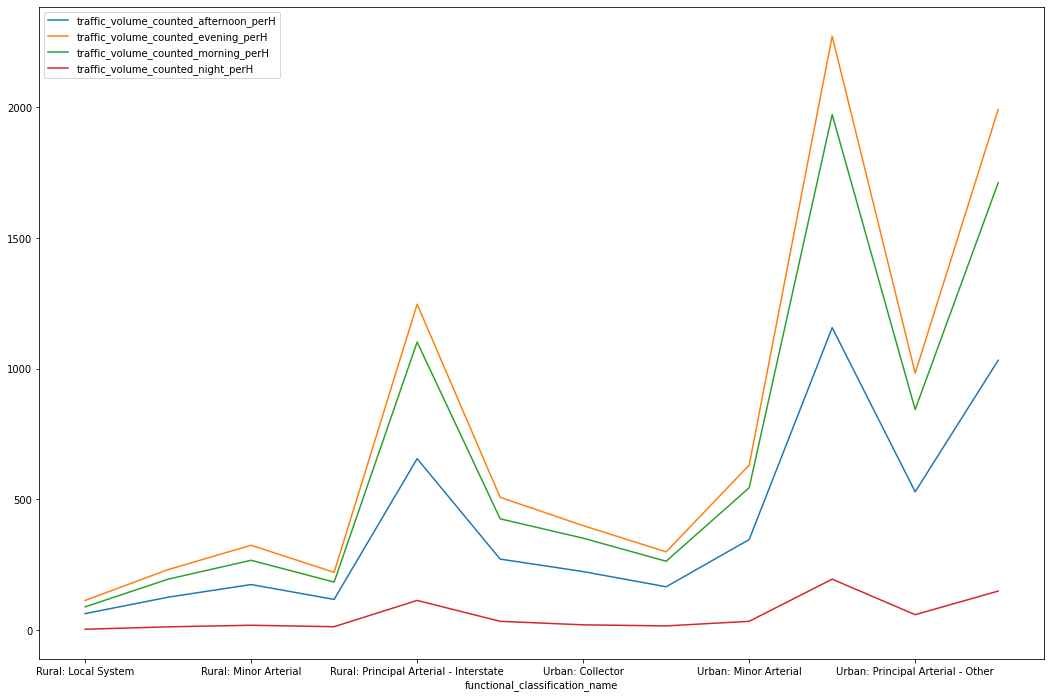

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

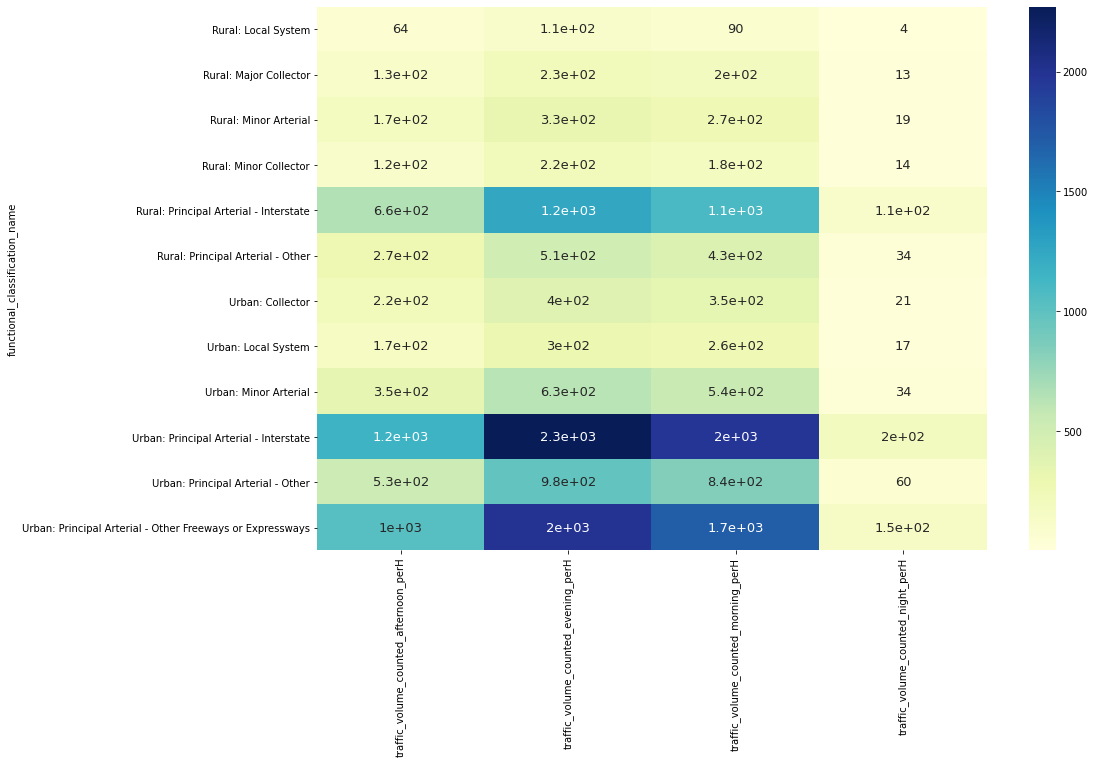

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu", annot=True,annot_kws={'size': 13})
plt.show()

**Inference:** 

The Urban regions are found to have generally more traffic than the Rural ones except for the Rural: Principal Arterial – Interstate which seems to have more traffic than some minor urban areas. Urban Principal Arterial (PA) – Interstate and Other Freeways & Expressways have most traffic in US than any other regions whereas Rural: Local System, Major Collector and Minor Arterial seems to be the least traffic regions.

---
### **Pattern/ Trend: 5**
Inference:

From all the inferences and observations made from various visualizations and analysis. It is found that for various states and station ids in US on all weekdays and months mean traffic on various directions of travel, lanes of travel and functional classifications at the night time is constant and doesn’t change much.
In general, across the United States night traffic is almost same, which can be visualized by the approximately straight lines in the various lines plots and also seen by the constant colour in heat maps for night time.


---





### **Insights from applying pivot table on more than two columns:**

Here, I've done this for only night time as it have some interesting insights which will be covered later at the end of all these following visualizations and analysis.

In [ ]:
#Try and visualize the time interval wise differnt analysis and visualization.
print("Enter the day section (1/2/3/4) to perform analysis:\n1. Night (00 to 06)\n2. Morning (06 to 12)\n3. Afternoon (12 to 18)\n4. Evening (18 to 24)")
print("(default day section is Evening, as overall large traffic section)")
day_section=int(input("Enter your choice: "))

if day_section==1:
  day_section="traffic_volume_counted_night_perH"
elif day_section==2:
  day_section="traffic_volume_counted_morning_perH"
elif day_section==3:
  day_section="traffic_volume_counted_afternoon_perH"
else:
  day_section="traffic_volume_counted_evening_perH"

Enter the day section (1/2/3/4) to perform analysis:
1. Night (00 to 06)
2. Morning (06 to 12)
3. Afternoon (12 to 18)
4. Evening (18 to 24)
(default day section is Evening, as overall large traffic section)
Enter your choice: 1


In [ ]:
#day_section's mean traffic per hour functional class and day of week wise
table = pd.pivot_table(traffic_df, values=[day_section], index=[ 'functional_classification_name'],
                    columns=['day_of_week'], aggfunc=np.mean)
table

traffic_volume_counted_night_perH  \
day_of_week                                                                        1   
functional_classification_name                                                         
Rural: Local System                                                         3.108280   
Rural: Major Collector                                                     10.246375   
Rural: Minor Arterial                                                      14.583480   
Rural: Minor Collector                                                     10.400268   
Rural: Principal Arterial - Interstate                                     84.066083   
Rural: Principal Arterial - Other                                          24.396526   
Urban: Collector                                                           19.997612   
Urban: Local System                                                        17.919291   
Urban: Minor Arterial                                                      31.870302   
Urban: Principal Arterial - Interstate                                    172.983490   
Urban: Principal Arterial - Other                                          54.477366   
Urban: Principal Arterial - Other Freeways or E...                        144.570033   

                                                                            \
day_of_week                                                  2           3   
functional_classification_name                                               
Rural: Local System                                   4.115915    4.199632   
Rural: Major Collector                               13.626294   13.840619   
Rural: Minor Arterial                                20.234325   20.742714   
Rural: Minor Collector                               13.702424   14.398101   
Rural: Principal Arterial - Interstate              116.027246  116.735958   
Rural: Principal Arterial - Other                    36.493109   36.752919   
Urban: Collector                                     19.966960   20.505622   
Urban: Local System                                  14.890438   16.060806   
Urban: Minor Arterial                                33.141956   34.522804   
Urban: Principal Arterial - Interstate              194.100396  199.193715   
Urban: Principal Arterial - Other                    58.335721   60.269750   
Urban: Principal Arterial - Other Freeways or E...  147.544680  151.347841   

                                                                            \
day_of_week                                                  4           5   
functional_classification_name                                               
Rural: Local System                                   4.333027    4.330071   
Rural: Major Collector                               14.071037   14.014382   
Rural: Minor Arterial                                20.826696   20.845149   
Rural: Minor Collector                               14.752501   14.637797   
Rural: Principal Arterial - Interstate              120.327353  122.706523   
Rural: Principal Arterial - Other                    36.882075   37.043803   
Urban: Collector                                     21.265388   21.071650   
Urban: Local System                                  16.535454   17.335264   
Urban: Minor Arterial                                35.120684   35.725217   
Urban: Principal Arterial - Interstate              202.057373  204.959217   
Urban: Principal Arterial - Other                    61.263474   62.181911   
Urban: Principal Arterial - Other Freeways or E...  152.055608  154.475250   

                                                                            
day_of_week                                                  6           7  
functional_classification_name                                              
Rural: Local System                                   4.142473    3.438172  
Rural: Major Collector                               13.939963   12.136323  
Rur

Visual ineference for the above table


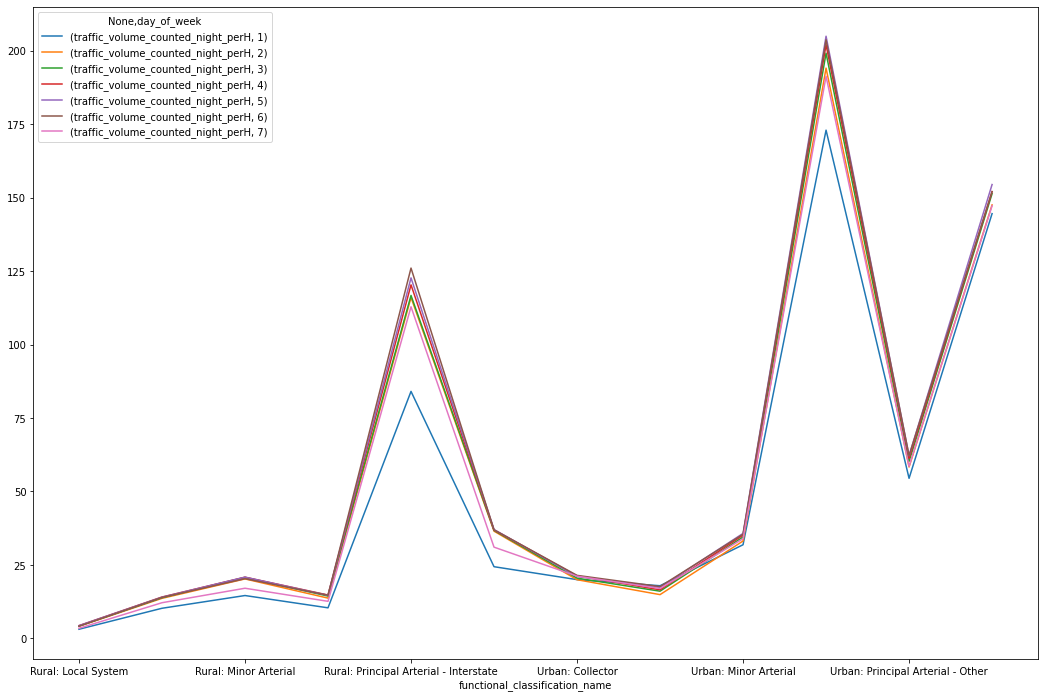

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

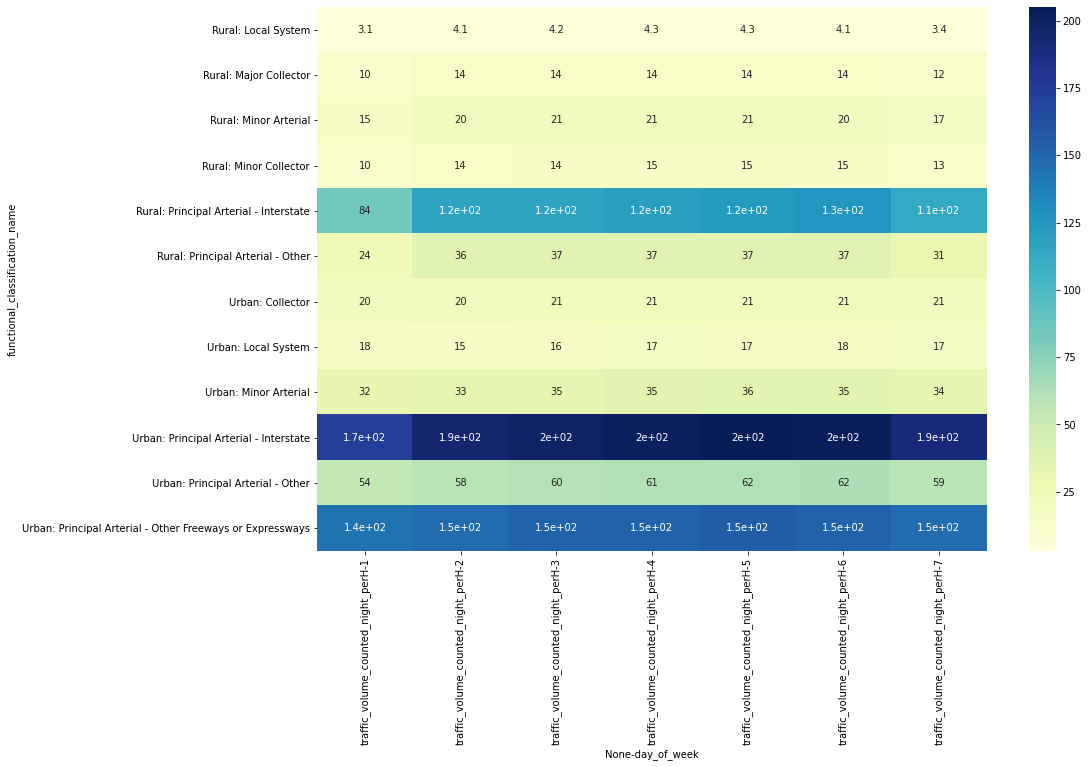

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu",annot=True,annot_kws={'size': 10})
plt.show()

In [ ]:
#day_section's mean traffic per hour functional class and month wise
table = pd.pivot_table(traffic_df, values=[day_section], index=[ 'functional_classification_name'],
                    columns=['month_of_data'], aggfunc=np.mean)
table

traffic_volume_counted_night_perH  \
month_of_data                                                                     1    
functional_classification_name                                                         
Rural: Local System                                                         3.516887   
Rural: Major Collector                                                     11.504114   
Rural: Minor Arterial                                                      17.151975   
Rural: Minor Collector                                                     11.238679   
Rural: Principal Arterial - Interstate                                     94.015246   
Rural: Principal Arterial - Other                                          30.028331   
Urban: Collector                                                           17.873187   
Urban: Local System                                                        14.837838   
Urban: Minor Arterial                                                      29.301860   
Urban: Principal Arterial - Interstate                                    175.702261   
Urban: Principal Arterial - Other                                          53.376004   
Urban: Principal Arterial - Other Freeways or E...                        140.532087   

                                                                            \
month_of_data                                               2           3    
functional_classification_name                                               
Rural: Local System                                   3.216301    3.777778   
Rural: Major Collector                               11.173270   11.783711   
Rural: Minor Arterial                                17.708381   19.003335   
Rural: Minor Collector                               11.662470   12.261619   
Rural: Principal Arterial - Interstate               95.777592  110.407202   
Rural: Principal Arterial - Other                    30.301831   33.197307   
Urban: Collector                                     20.519501   19.224349   
Urban: Local System                                  15.710591   17.676042   
Urban: Minor Arterial                                29.561293   31.918606   
Urban: Principal Arterial - Interstate              174.996645  190.834920   
Urban: Principal Arterial - Other                    52.949280   57.596189   
Urban: Principal Arterial - Other Freeways or E...  133.538823  142.878287   

                                                                            \
month_of_data                                               4           5    
functional_classification_name                                               
Rural: Local System                                   4.255988    4.426254   
Rural: Major Collector                               12.359782   13.873372   
Rural: Minor Arterial                                19.234444   19.400197   
Rural: Minor Collector                               15.436095   16.191557   
Rural: Principal Arterial - Interstate              114.856266  118.694570   
Rural: Principal Arterial - Other                    33.237930   34.630724   
Urban: Collector                                     19.157257   21.128749   
Urban: Local System                                  14.054079   16.873563   
Urban: Minor Arterial                                33.902735   35.093746   
Urban: Principal Arterial - Interstate              190.588179  199.356838   
Urban: Principal Arterial - Other                    57.976994   60.326861   
Urban: Principal Arterial - Other Freeways or E...  141.386935  152.516436   

                                                                            \
month_of_data                                               6           7    
functional_classification_name                                               
Rural: Local System                                   4.887262    5.298295   
Rural: Major Collector                               15.300404   15.065686  

Visual ineference for the above table


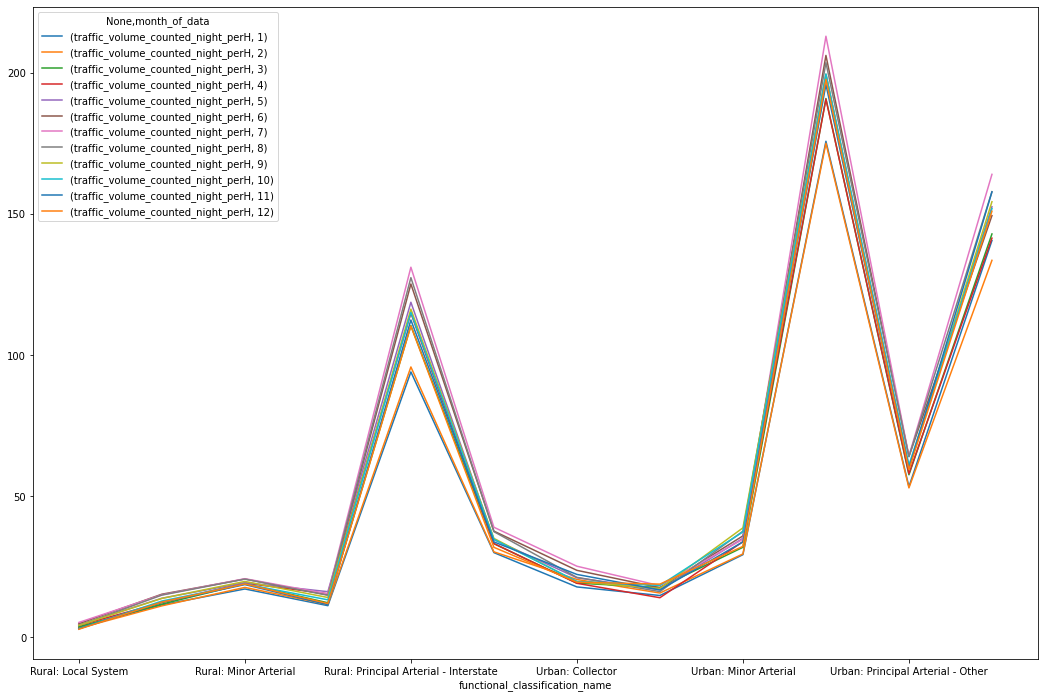

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

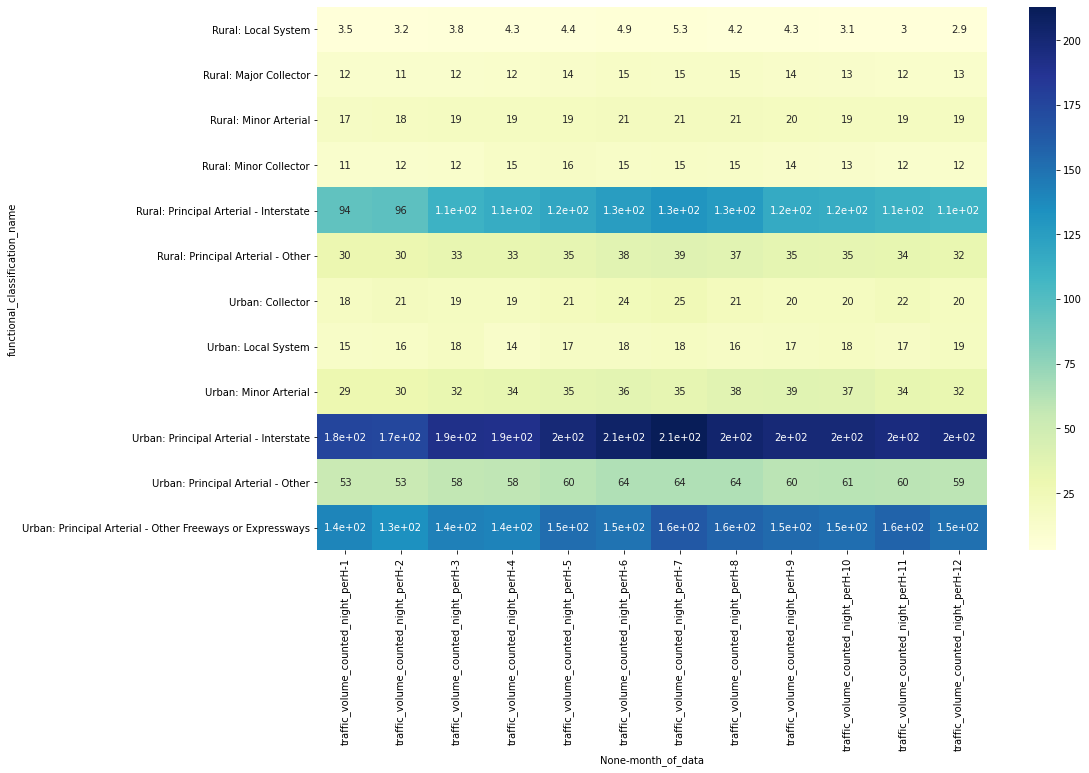

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu",annot=True,annot_kws={'size': 10})
plt.show()

In [ ]:
#day_section's mean traffic per hour direction of travel and day of week wise
table = pd.pivot_table(traffic_df, values=[day_section], index=[ 'direction_of_travel_name'],
                    columns=['day_of_week'], aggfunc=np.mean)
table

traffic_volume_counted_night_perH  \
day_of_week                                                                        1   
direction_of_travel_name                                                               
East                                                                       80.112493   
East-West or Southeast-Northwest combined (ATR ...                        155.211841   
North                                                                      85.076737   
North-South or Northeast-Southwest combined (AT...                        132.365468   
Northeast                                                                  42.621359   
Northwest                                                                  39.157454   
South                                                                      83.578098   
Southeast                                                                  37.659776   
Southwest                                                                  44.817812   
West                                                                       80.313835   

                                                                            \
day_of_week                                                  2           3   
direction_of_travel_name                                                     
East                                                 89.654575   91.178563   
East-West or Southeast-Northwest combined (ATR ...  158.506263  152.982620   
North                                               101.192941  102.945283   
North-South or Northeast-Southwest combined (AT...  169.032791  169.948366   
Northeast                                            49.411441   52.643719   
Northwest                                            44.788619   46.519552   
South                                                97.988378  100.453197   
Southeast                                            51.455690   53.797451   
Southwest                                            61.583379   64.164479   
West                                                 88.623381   90.351912   

                                                                            \
day_of_week                                                  4           5   
direction_of_travel_name                                                     
East                                                 92.819762   94.307426   
East-West or Southeast-Northwest combined (ATR ...  153.806810  158.447914   
North                                               104.183127  105.072033   
North-South or Northeast-Southwest combined (AT...  172.567828  176.927917   
Northeast                                            53.010618   53.788785   
Northwest                                            47.026903   48.051864   
South                                               101.976942  103.989689   
Southeast                                            53.798133   53.377679   
Southwest                                            64.885873   64.245628   
West                                                 91.687646   93.024457   

                                                                            
day_of_week                                                  6           7  
direction_of_travel_name                                                    
East                                                 93.637581   87.191408  
East-West or Southeast-Northwest combined (ATR ...  159.731122  180.125207  
North                                               104.950076   96.128371  
North-South or Northeast-Southwest combined (AT...  173.070461  167.740647  
Northeast                                            54.091183   48.898754  
Northwest                                            47.601366   44.275961  
South                                               104.712389   98.226038  
Southeast                                            51.941624   44.421829  
Southwest                    

Visual ineference for the above table


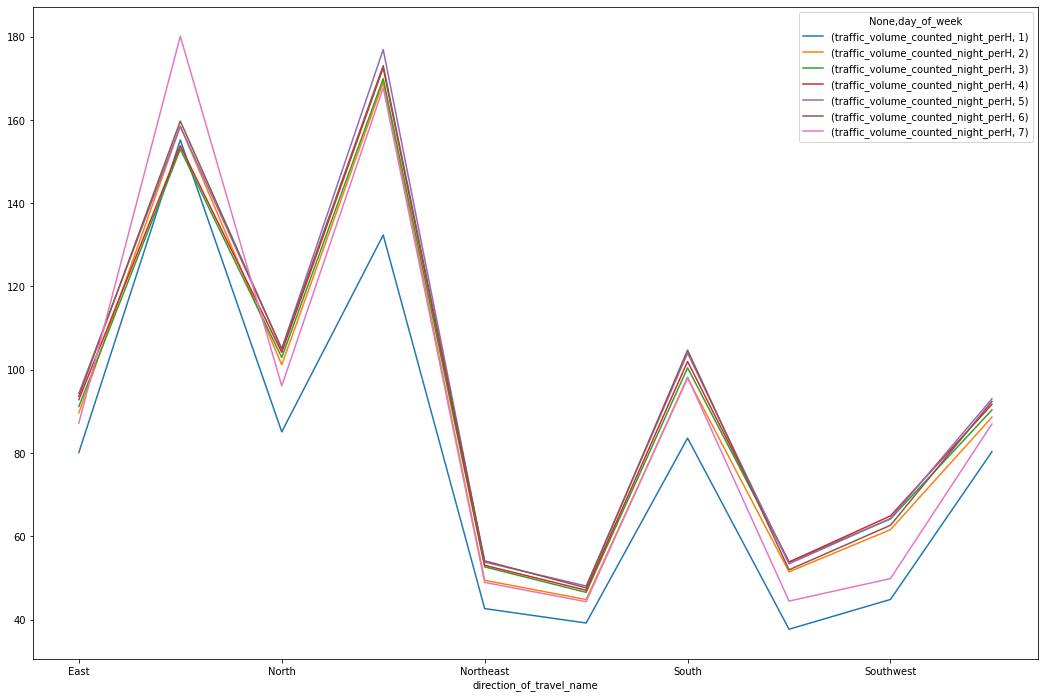

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

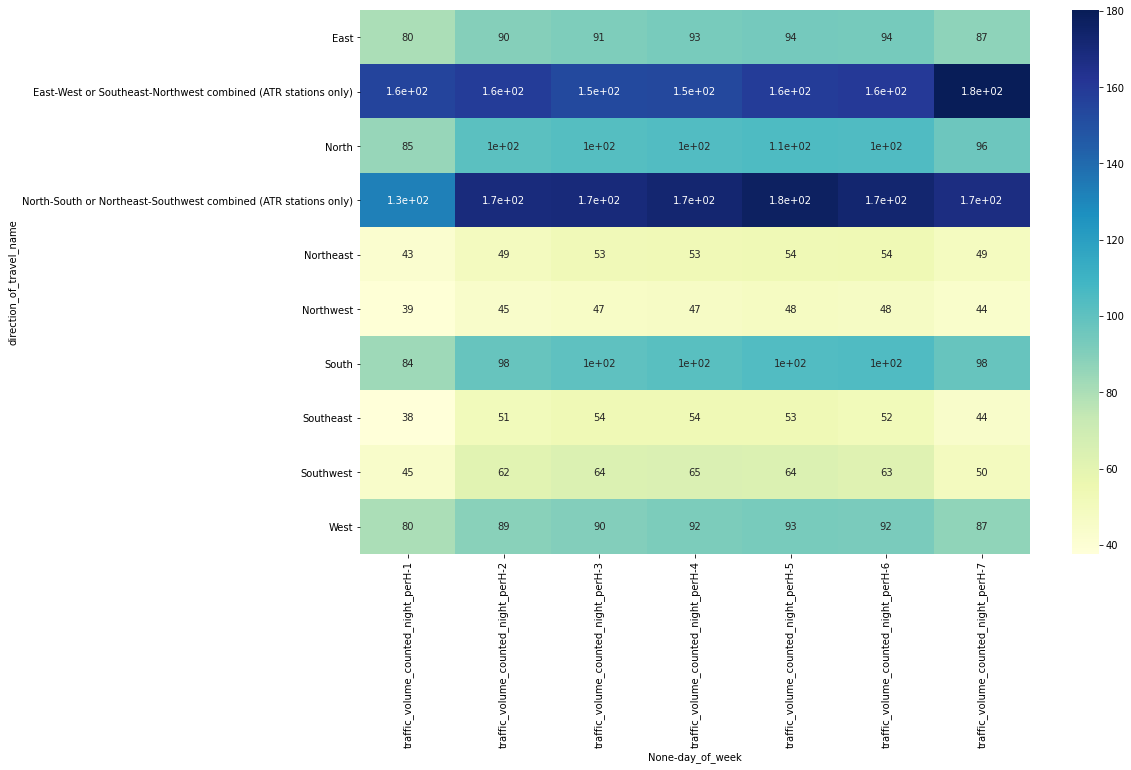

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu",annot=True,annot_kws={'size': 10})
plt.show()

In [ ]:
#day_section's mean traffic per hour direction of travel and day of week wise
table = pd.pivot_table(traffic_df, values=[day_section], index=[ 'direction_of_travel_name'],
                    columns=['month_of_data'], aggfunc=np.mean)
table

traffic_volume_counted_night_perH  \
month_of_data                                                                     1    
direction_of_travel_name                                                               
East                                                                       80.877938   
East-West or Southeast-Northwest combined (ATR ...                        161.966321   
North                                                                      90.025713   
North-South or Northeast-Southwest combined (AT...                        149.380095   
Northeast                                                                  41.177939   
Northwest                                                                  39.630435   
South                                                                      88.007584   
Southeast                                                                  43.236200   
Southwest                                                                  49.492063   
West                                                                       80.035205   

                                                                            \
month_of_data                                               2           3    
direction_of_travel_name                                                     
East                                                 79.156209   87.065980   
East-West or Southeast-Northwest combined (ATR ...  165.658628  129.869439   
North                                                88.874901   97.835554   
North-South or Northeast-Southwest combined (AT...  149.606415  153.806668   
Northeast                                            47.954747   42.619410   
Northwest                                            40.461946   43.310296   
South                                                87.854565   95.396139   
Southeast                                            45.060331   47.123781   
Southwest                                            56.710327   52.395303   
West                                                 79.286146   86.922856   

                                                                            \
month_of_data                                               4           5    
direction_of_travel_name                                                     
East                                                 87.738023   91.859811   
East-West or Southeast-Northwest combined (ATR ...  146.864632  146.354116   
North                                                99.740928  103.463186   
North-South or Northeast-Southwest combined (AT...  161.579648  160.274778   
Northeast                                            52.285510   55.069174   
Northwest                                            44.495682   46.535966   
South                                                98.225127  101.710233   
Southeast                                            47.880309   49.155779   
Southwest                                            59.817918   61.100514   
West                                                 86.547845   90.701809   

                                                                            \
month_of_data                                               6           7    
direction_of_travel_name                                                     
East                                                 94.698760   98.450922   
East-West or Southeast-Northwest combined (ATR ...  160.829992  158.950240   
North                                               106.209712  109.841040   
North-South or Northeast-Southwest combined (AT...  167.684243  178.436653   
Northeast                                            57.062019   55.301095   
Northwest                                            48.809369   48.549321   
South                                               104.320345  109.396573   
Southeast                                            54.354635   54.684050   
Southwest         

Visual ineference for the above table


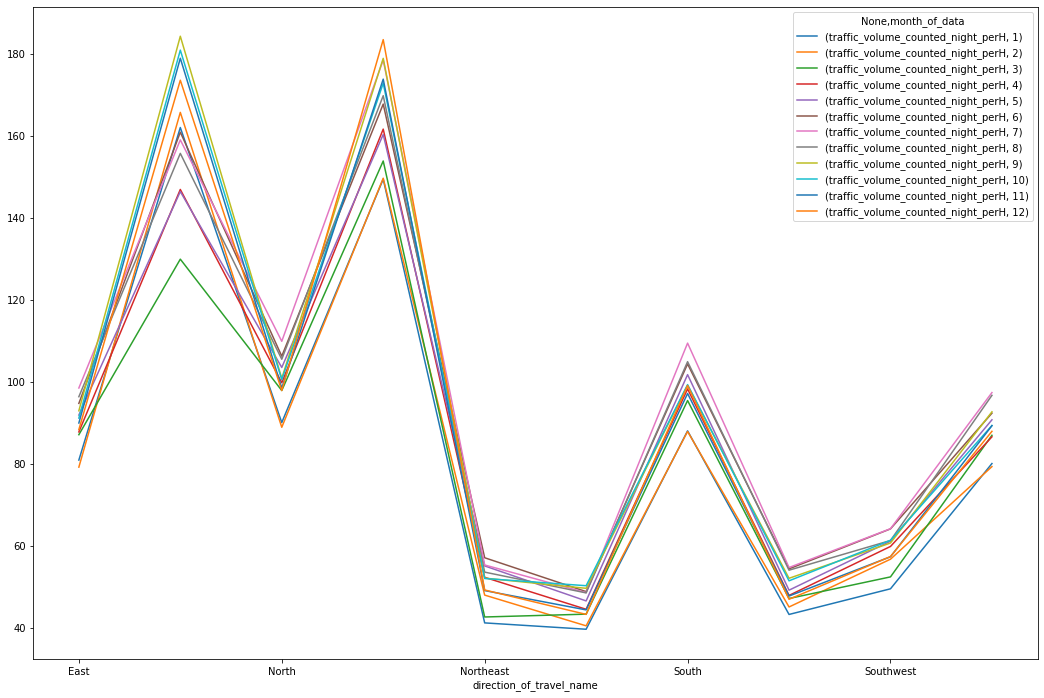

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

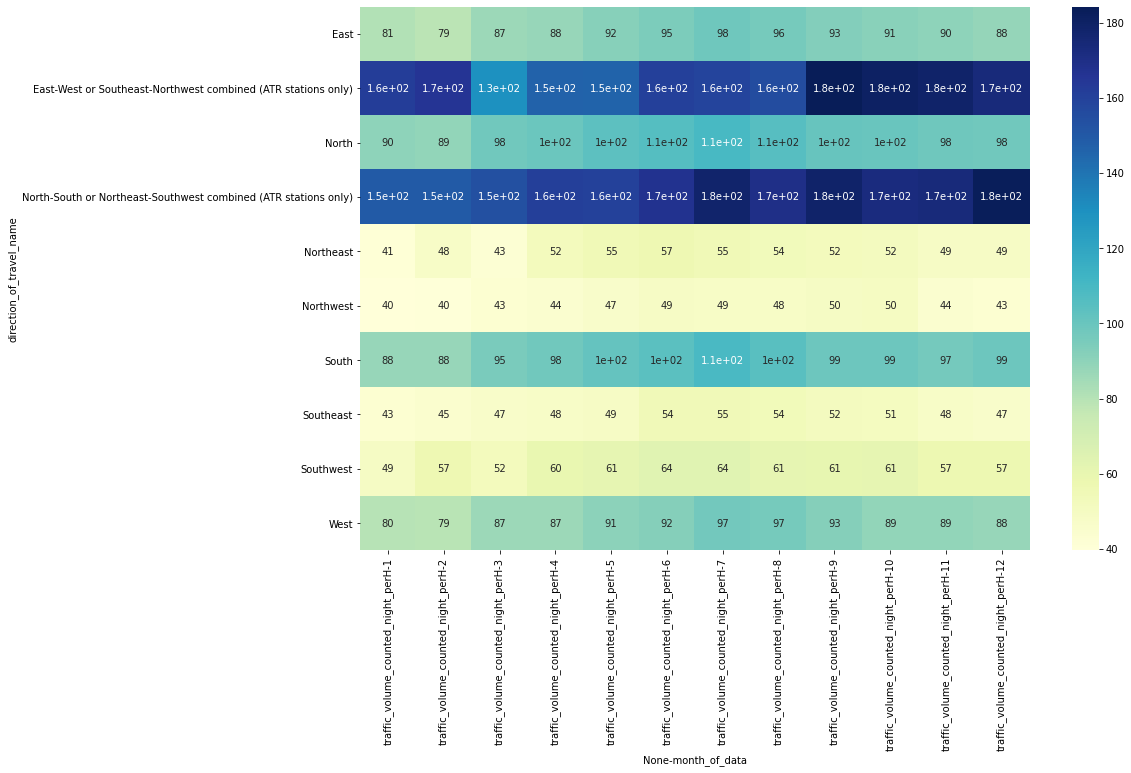

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu",annot=True,annot_kws={'size': 10})
plt.show()

In [ ]:
#day_section's mean traffic per hour monthand day of week wise
table = pd.pivot_table(traffic_df, values=[day_section], index=[ 'month_of_data'],
                    columns=['day_of_week'], aggfunc=np.mean)
table

traffic_volume_counted_night_perH                          \
day_of_week                                   1           2           3   
month_of_data                                                             
1                                     73.305862   85.422528   87.958327   
2                                     70.919047   82.784675   85.048584   
3                                     81.541837   93.574404   94.783635   
4                                     80.355046   93.948273   95.843640   
5                                     84.954708   93.519731   99.650032   
6                                     85.195935  102.124102  101.220042   
7                                     91.661735  106.172213  104.700320   
8                                     90.319890  101.844411  102.492973   
9                                     83.120288   93.025958   99.275732   
10                                    82.774859   95.534780   98.161346   
11                                    82.495901   97.810593   97.595725   
12                                    82.246266   94.853208   98.393483   

                                                               
day_of_week             4           5           6           7  
month_of_data                                                  
1               88.139977   93.406408   86.446818   81.717994  
2               89.530794   89.028577   91.563923   83.613288  
3               95.132280   95.750914   95.575502   90.987880  
4               96.292269   98.773144   99.306086   92.242560  
5              101.008037  103.594682  105.357013   98.008376  
6              102.774124  104.682275  106.624967   99.218583  
7              105.810272  108.949942  110.299050  102.592956  
8              103.632747  105.819783  106.808713  102.137591  
9              100.010618  102.346334  103.639666   97.433483  
10              98.302420  100.643761  101.947105   92.703688  
11             100.578722   97.059276   97.820112   89.271091  
12             100.250327   99.966267   92.344930   87.133901

Visual ineference for the above table


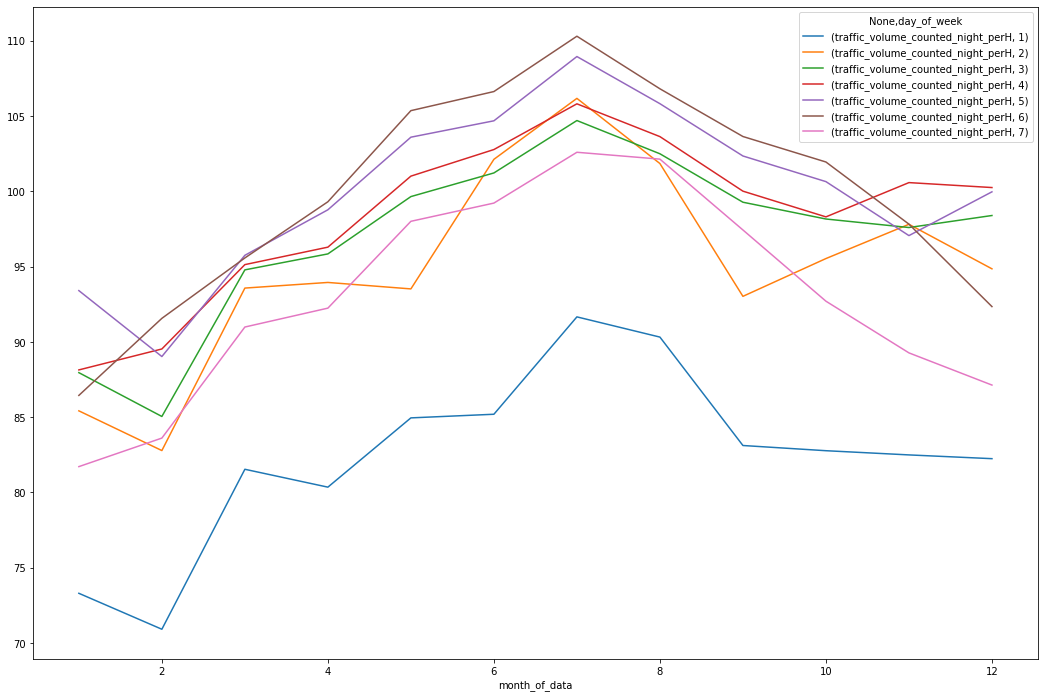

In [ ]:
#Bar plot visualization for the same pivot table
print("Visual ineference for the above table")
table.plot(figsize=(18,12))

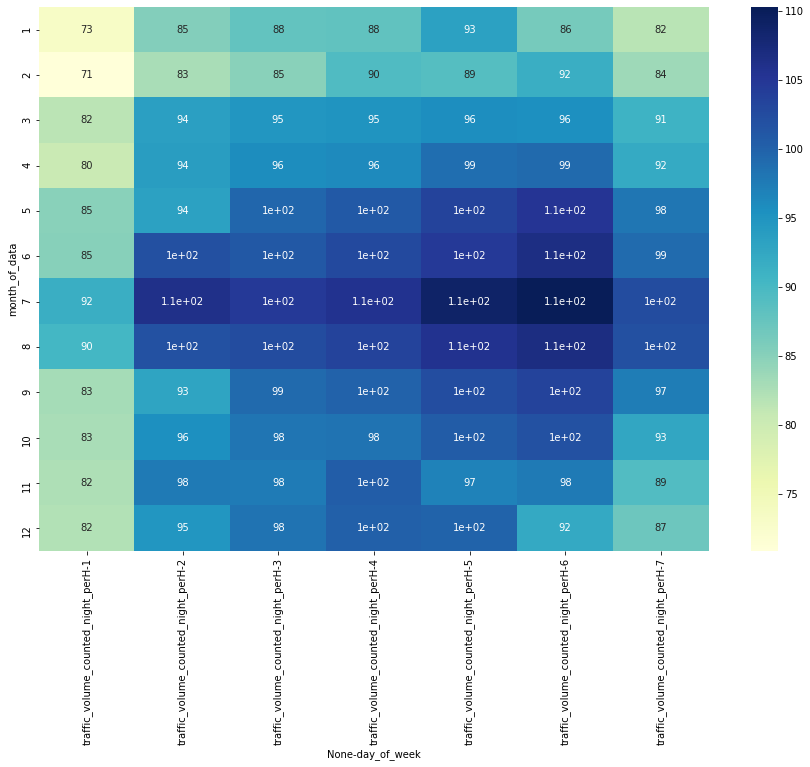

In [ ]:
#Heatmap representation of the same plot and pivot table
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(table, cmap="YlGnBu",annot=True,annot_kws={'size': 10})
plt.show()

In [ ]:
#updated display of traffic_df
print(traffic_df.shape)
traffic_df.head()

(7034333, 12)


,date,day_of_week,direction_of_travel_name,fips_state_code,functional_classification_name,lane_of_travel,month_of_data,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
0,2015-04-07,3,North,56,Rural: Principal Arterial - Other,1,4,000084,22,200,128,291
1,2015-09-26,7,West,21,Urban: Principal Arterial - Interstate,2,9,056P94,269,2560,1468,2646
2,2015-06-16,3,East,6,Urban: Principal Arterial - Interstate,0,6,077590,718,7320,4223,9595
3,2015-04-26,1,South,55,Urban: Principal Arterial - Interstate,1,4,450001,84,1451,978,1668
4,2015-05-23,7,East,4,Rural: Minor Arterial,0,5,102210,4,104,79,146




---



## **5. Data Modelling**



### **Simple Route Prediction Model**

User Input:  

1. Week day of travel
2. Month of travel
3. Fips State code


Output: 
1. Most and least traffic conditions to keep in mind like direction of travel, functional class, lane of travel etc




In [ ]:
def user_input(temp_data):
    """
    This function takes input from user and then filters the traffic_df
    dataframe according to user query into temp_data which is initialized as traffic_df

    input: traffic_df
    output: user input in the dictionary format, the sorted filtered traffic_df
    """

    print("Enter your Travel Details: ")
    
    #Take fips state code from user
    fips=int(input("Enter the fips state code (UK) (1-51):"))
    while fips not in temp_data["fips_state_code"]: #Check whether it is in traffic data or not
        fips=int(input("Re-enter, Entered code doesn't exist in DB:"))
    temp_data=temp_data[temp_data["fips_state_code"]==fips]

    #Take month of travel as input from user
    month=int(input("Enter the month of travel (1 for Jan - 12 for Dec):"))
    while month<1 or month>12:#Check month is valid or not
        month=int(input("Re-enter ([1,12] only):"))
    temp_data=temp_data[temp_data["month_of_data"]==month]
    
    #Take day of week input from user
    weekday=int(input("Enter the week day of travel (1 for Sun - 7 for Sat):"))
    while weekday<1 or weekday>7:#Validate the day of week
        weekday=int(input("Re-enter ([1,7] only):"))
    temp_data=temp_data[temp_data["day_of_week"]==weekday]

    #Sorting the filtered temp_data in order of maximum mean traffic per hour time interval to the least
    temp_data.sort_values(["traffic_volume_counted_evening_perH"
    ,"traffic_volume_counted_morning_perH"
    ,"traffic_volume_counted_afternoon_perH"
    ,"traffic_volume_counted_night_perH"],inplace=True)

    #return the user input and the required data with routes
    return {'fips':fips,'weekday':weekday,'month':month},temp_data

input_cond,temp_data=user_input(traffic_df)
print("\n\n\tOutput:\n")
print("Input conditions:",input_cond)

print("Top 5 Minimal Traffic Conditions to note:")
#Display only the required columns
temp_data.drop(columns=["date","day_of_week","fips_state_code","month_of_data"]).head()

Enter your Travel Details: 
Enter the fips state code (UK) (1-51):23
Enter the month of travel (1 for Jan - 12 for Dec):8
Enter the week day of travel (1 for Sun - 7 for Sat):7


	Output:

Input conditions: {'fips': 23, 'weekday': 7, 'month': 8}
Top 5 Minimal Traffic Conditions to note:


,direction_of_travel_name,functional_classification_name,lane_of_travel,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
531953,Southeast,Rural: Major Collector,0,830714,5,44,28,50
640406,Southeast,Rural: Major Collector,0,830714,2,46,30,55
6016081,Southeast,Rural: Major Collector,0,830714,2,45,34,58
5564095,Southeast,Rural: Major Collector,0,830714,2,57,37,59
1840781,Southeast,Rural: Major Collector,0,830714,4,51,35,61


In [ ]:
print("Top 5 Maximum Traffic Condition set to avoid:")
#display only the required data
temp_data.drop(columns=["date","day_of_week","fips_state_code","month_of_data"]).tail()

Top 5 Maximum Traffic Condition set to avoid:


,direction_of_travel_name,functional_classification_name,lane_of_travel,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH
500020,South,Urban: Principal Arterial - Interstate,0,054702,311,7184,4292,7151
5019964,North,Urban: Principal Arterial - Interstate,0,054701,382,6632,4478,7178
5430207,North,Urban: Principal Arterial - Interstate,0,054701,438,6807,4418,7603
5050379,North,Urban: Principal Arterial - Interstate,0,054701,429,7160,4813,7914
5501613,North,Urban: Principal Arterial - Interstate,0,054701,477,7400,4789,8369




---


### **Complex Evening Traffic Prediction Model for UK state with maximum dispersion in traffic**





### Model used:


> **Random Forest Regressor**


### **Implementation:**
 

> **Sklearn**



**Points to remember:**



> I have predicted only evening (18-24 Hr) traffic as it is maximum compared to others across all states for the year 2015

> Due to large training set and training time for all the states, this prediction model is built only for one UK state (i.e with fips 4)




> State with fips 4 has been selected because of its most dispersed traffic data (maximum variance/ standard deviation) making it difficult for normal humans to predict.



> Also, the dataset used is a combination of both datasets traffic_df and traffic_station_df with suitable columns





In [ ]:
#Pivot table command to find out the state with maximum variance/std
table = pd.pivot_table(traffic_df, values=["traffic_volume_counted_night_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_evening_perH"], index=[ 'fips_state_code'],
                     aggfunc=np.std)

#sorting acc to maximum std/variance in order of max to min traffic traffic section
table.sort_values(["traffic_volume_counted_evening_perH","traffic_volume_counted_morning_perH","traffic_volume_counted_afternoon_perH","traffic_volume_counted_night_perH"],ascending=False,inplace=True)
table.head()

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
fips_state_code,,,,
4,1610.134471,3164.583730,2838.967937,358.611802
45,1422.810118,2632.430106,2337.191258,227.279225
9,1288.612982,2522.688957,2227.534472,228.524686
6,1237.945104,2425.696455,2162.385861,267.426181
24,1202.921396,2378.626705,2092.301174,236.218313


In [ ]:
#Lowest 5 variance/ standard deviation states
table.tail()

,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_night_perH
fips_state_code,,,,
35,212.658776,384.141942,360.101529,36.863320
2,202.016283,363.043344,331.052265,30.245032
46,193.768974,361.565654,305.044451,24.320710
30,153.948771,282.127854,240.478741,19.083830
56,139.136246,253.092500,218.727344,22.037978


In [ ]:
#Considering traffic_df of US take with fips code 4 only as it have maximum standard deviation/ variance
traffic_df=traffic_df[traffic_df["fips_state_code"]==4]

In [ ]:
#Considering traffic_station_df of US take with fips code 4 only as it have maximum standard deviation/ variance
traffic_station_df=traffic_station_df[traffic_station_df["fips_state_code"]==4]

In [ ]:
#Resetting the index from 0 for both dataframes
traffic_df.reset_index(inplace=True)
traffic_station_df.reset_index(inplace=True)

In [ ]:
#Checking for null values in station data
traffic_station_df.isna().sum()

index                                           0
concurrent_route_signing                        0
fips_state_code                                 0
hpms_sample_type                                0
lane_of_travel_name                             0
latitude                                        0
longitude                                       0
method_of_data_retrieval_name                   0
method_of_traffic_volume_counting_name          0
national_highway_system                         0
number_of_lanes_in_direction_indicated          0
number_of_lanes_monitored_for_traffic_volume    0
Station_used_for_Heavy_Vehicle                  0
station_id                                      0
station_location                                0
type_of_sensor_name                             0
dtype: int64

In [ ]:
#Inner Join both the dataset using station_id as the common key and create a new_df which will be treated as final traffic_df.
new_df = pd.merge(traffic_df, traffic_station_df,  how='inner', left_on=['station_id'], right_on = ['station_id'])

In [ ]:
#Drop the repeated and unwanted columns like station_location, index_x, index_y etc.
new_df.drop(columns=["concurrent_route_signing","lane_of_travel_name","hpms_sample_type","index_y","fips_state_code_y"],inplace=True)
new_df.drop(columns=["station_location","Station_used_for_Heavy_Vehicle","index_x","method_of_traffic_volume_counting_name"],inplace=True)

In [ ]:
#This column can be one-hot encoded
new_df["type_of_sensor_name"].unique()

array(['Inductance loop', 'Piezoelectric', 'Sonic/acoustic'], dtype=object)

In [ ]:
#Replacing traffic_df with new_df (inner joined df)
traffic_df=new_df

In [ ]:
#dropping repeated column
traffic_df.drop(columns=["fips_state_code_x"],inplace=True)

In [ ]:
#Dropping date column
traffic_df.drop(columns=["date"],inplace=True)

In [ ]:
#display of traffic_df
traffic_df

,day_of_week,direction_of_travel_name,functional_classification_name,lane_of_travel,month_of_data,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,latitude,longitude,method_of_data_retrieval_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,type_of_sensor_name
0,7,East,Rural: Minor Arterial,0,5,102210,4,104,79,146,34.036747,109.186545,Not automated (manual),0,1,1,Inductance loop
1,7,East,Rural: Minor Arterial,0,5,102210,4,104,79,146,34.036747,109.186545,Not automated (manual),0,1,1,Inductance loop
2,3,East,Rural: Minor Arterial,0,4,102210,6,55,39,86,34.036747,109.186545,Not automated (manual),0,1,1,Inductance loop
3,3,East,Rural: Minor Arterial,0,4,102210,6,55,39,86,34.036747,109.186545,Not automated (manual),0,1,1,Inductance loop
4,5,East,Rural: Minor Arterial,0,11,102210,2,61,46,84,34.036747,109.186545,Not automated (manual),0,1,1,Inductance loop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197784,1,West,Urban: Principal Arterial - Interstate,0,8,100093,1475,9994,5133,9751,33.462885,112.227703,Automated (telemetry),1,5,6,Sonic/acoustic
197785,6,West,Urban: Principal Arterial - Interstate,0,1,100097,219,3664,752,1462,33.462189,112.161187,Automated (telemetry),1,5,6,Sonic/acoustic
197786,6,West,Urban: Principal Arterial - Interstate,0,1,100097,219,3664,752,1462,33.462189,112.161187,Automated (telemetry),1,5,6,Sonic/acoustic
197787,1,West,Urban: Principal Arterial - Interstate,0,8,100097,390,9797,5532,8703,33.462189,112.161187,Automated (telemetry),1,5,6,Sonic/acoustic




---



### **Feature Engineering:**

As all the features were categorical except for longitude, latitude, number of lanes in direction indicated and number of lanes monitored for traffic volume.

Depending on the type of feature, type of categorical features and number of categories in categorical features different encoding techniques were used. 


**Binary Encoding**

In [ ]:
#Method of data retrieval contained two categories as automated and manual which were encoded as 1 and 0 respectively. 
traffic_df.replace({'method_of_data_retrieval_name':{'Not automated (manual)':0,'Automated (telemetry)':1}},inplace=True)

In [ ]:
#since all lanes are same dropping this column for this case
traffic_df["lane_of_travel"].unique()

array([0])

In [ ]:
#dropping lane of travel
traffic_df.drop(columns=["lane_of_travel"],inplace=True)

**One-Hot Encoding**

Categories of day of week, direction of travel, functional classes, lane of travel and type of sensor were one-hot encoded as columns. 

In [ ]:
type_of_sensor=pd.get_dummies(traffic_df["type_of_sensor_name"],prefix='type_of_sensor',drop_first=False)
week_day=pd.get_dummies(traffic_df["day_of_week"],prefix='day_of_week',drop_first=False)
Travel_direction=pd.get_dummies(traffic_df["direction_of_travel_name"],prefix='Travel_direction',drop_first=False)
Functional_classes=pd.get_dummies(traffic_df["functional_classification_name"],prefix='Functional_classes',drop_first=False)

In [ ]:
#Concating the dummy one-hot encoded features with traffic_df
traffic_df=pd.concat([traffic_df,Travel_direction,Functional_classes,week_day,type_of_sensor],axis=1)

In [ ]:
#dropping columns whose categories are one-hot encoded
traffic_df.drop(columns=["type_of_sensor_name","day_of_week","direction_of_travel_name","functional_classification_name"],inplace=True)

In [ ]:
#Encoded dataframe display
traffic_df

,month_of_data,station_id,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,latitude,longitude,method_of_data_retrieval_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,Travel_direction_East,Travel_direction_North,Travel_direction_South,Travel_direction_West,Functional_classes_Rural: Major Collector,Functional_classes_Rural: Minor Arterial,Functional_classes_Rural: Minor Collector,Functional_classes_Rural: Principal Arterial - Interstate,Functional_classes_Rural: Principal Arterial - Other,Functional_classes_Urban: Minor Arterial,Functional_classes_Urban: Principal Arterial - Interstate,Functional_classes_Urban: Principal Arterial - Other,Functional_classes_Urban: Principal Arterial - Other Freeways or Expressways,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,type_of_sensor_Inductance loop,type_of_sensor_Piezoelectric,type_of_sensor_Sonic/acoustic
0,5,102210,4,104,79,146,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,5,102210,4,104,79,146,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,4,102210,6,55,39,86,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,4,102210,6,55,39,86,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,11,102210,2,61,46,84,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197784,8,100093,1475,9994,5133,9751,33.462885,112.227703,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
197785,1,100097,219,3664,752,1462,33.462189,112.161187,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
197786,1,100097,219,3664,752,1462,33.462189,112.161187,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
197787,8,100097,390,9797,5532,8703,33.462189,112.161187,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


**Feature Hash Encoding:**
The fips state with id “4” contained near about 269 different station ids. This feature is a nominal categorical feature hence cannot be label encoded and being large in number it can’t be one-hot encoded as well.
 
The station ids categorical sequences of symbolic feature names (strings) into SciPy sparse matrices, using a hash function to compute the matrix column corresponding to a name. Hence, 269 categorical features were converted to 10 station groups columns.


In [ ]:
#Number of unique station ids in fips state code 4!
len(traffic_df["station_id"].unique())

269

In [ ]:
#converting the 269 station ids to 10 station groups
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')
sp = fh.fit_transform(traffic_df['station_id'])
df = pd.DataFrame(sp.toarray(), columns=['station_group_1', 'station_group_2', 'station_group_3', 'station_group_4', 'station_group_5', 'station_group_6', 'station_group_7', 'station_group_8','station_group_9','station_group_10'])

In [ ]:
#Concating those columns/station groups with existing traffic_df
traffic_df=pd.concat([traffic_df, df], axis=1)

In [ ]:
#dropping station_id column
traffic_df.drop(columns=["station_id"],inplace=True)

In [ ]:
#Fill the null values with 0 if any
traffic_df.fillna(0,inplace=True)

In [ ]:
#Final dataframe to be trained
traffic_df

,month_of_data,traffic_volume_counted_night_perH,traffic_volume_counted_morning_perH,traffic_volume_counted_afternoon_perH,traffic_volume_counted_evening_perH,latitude,longitude,method_of_data_retrieval_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,Travel_direction_East,Travel_direction_North,Travel_direction_South,Travel_direction_West,Functional_classes_Rural: Major Collector,Functional_classes_Rural: Minor Arterial,Functional_classes_Rural: Minor Collector,Functional_classes_Rural: Principal Arterial - Interstate,Functional_classes_Rural: Principal Arterial - Other,Functional_classes_Urban: Minor Arterial,Functional_classes_Urban: Principal Arterial - Interstate,Functional_classes_Urban: Principal Arterial - Other,Functional_classes_Urban: Principal Arterial - Other Freeways or Expressways,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,type_of_sensor_Inductance loop,type_of_sensor_Piezoelectric,type_of_sensor_Sonic/acoustic,station_group_1,station_group_2,station_group_3,station_group_4,station_group_5,station_group_6,station_group_7,station_group_8,station_group_9,station_group_10
0,5,4,104,79,146,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0
1,5,4,104,79,146,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0
2,4,6,55,39,86,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0
3,4,6,55,39,86,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0
4,11,2,61,46,84,34.036747,109.186545,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197784,8,1475,9994,5133,9751,33.462885,112.227703,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-3.0
197785,1,219,3664,752,1462,33.462189,112.161187,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-3.0
197786,1,219,3664,752,1462,33.462189,112.161187,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-3.0
197787,8,390,9797,5532,8703,33.462189,112.161187,1,1,5,6,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,-3.0


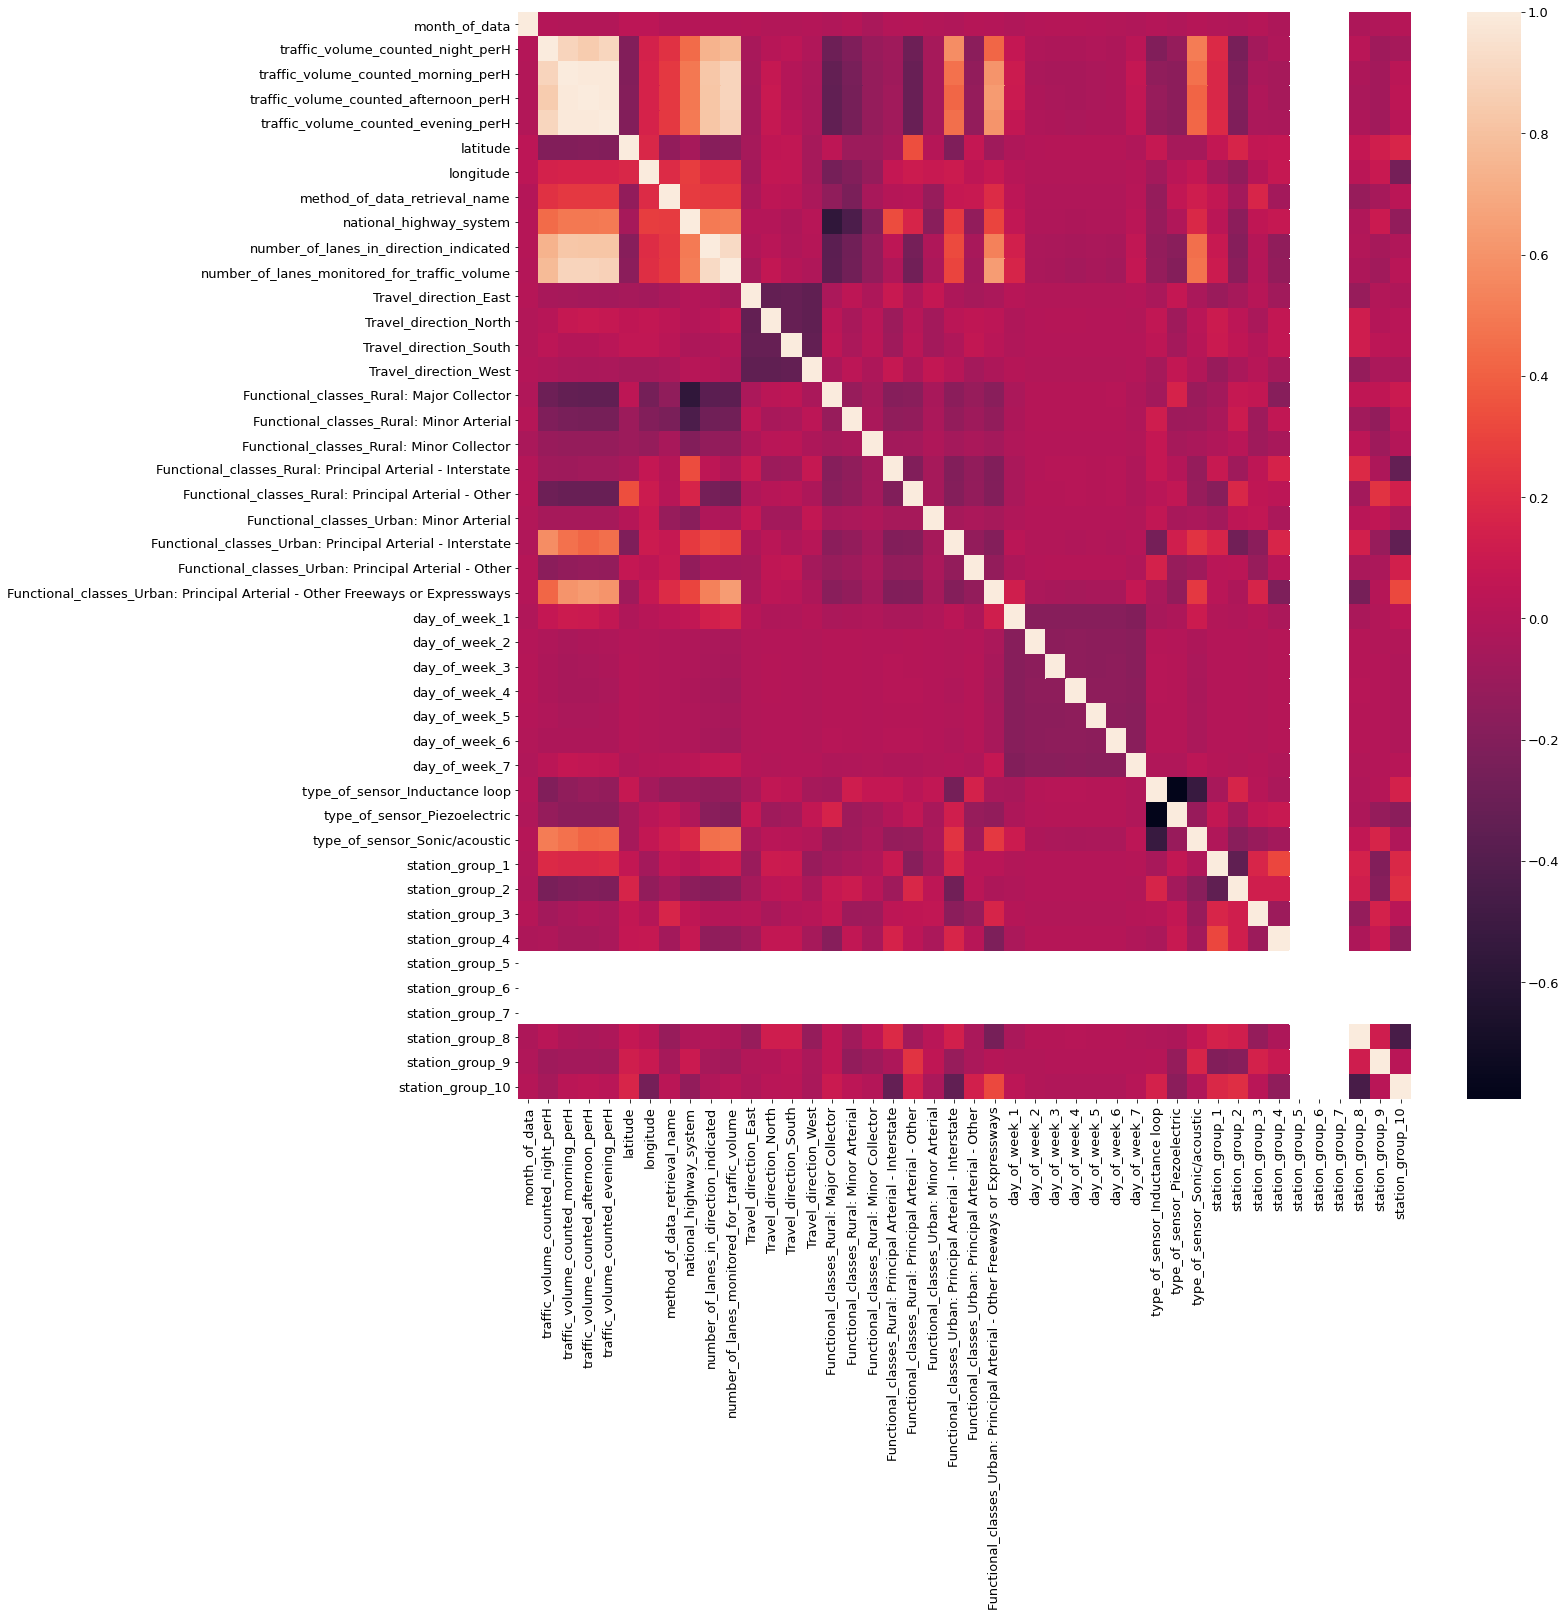

In [ ]:
#Pearson's correlation plot among various variables
fig, ax = plt.subplots(figsize=(20,20)) 

sns.heatmap(traffic_df.corr(method ='pearson'),annot_kws={'size': 13})
plt.savefig('correlation_matrix.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
# Labels are the values we want to predict
labels = np.array(traffic_df['traffic_volume_counted_evening_perH'])

# Remove the labels from the features
features= traffic_df.drop(columns=['traffic_volume_counted_afternoon_perH','traffic_volume_counted_evening_perH','traffic_volume_counted_night_perH','traffic_volume_counted_morning_perH'])

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

In [ ]:
#Shapes of train test split features and labels
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (158231, 40)
Training Labels Shape: (158231,)
Testing Features Shape: (39558, 40)
Testing Labels Shape: (39558,)


### **Training & Predictions:**

Sklearn: Random Forest Regressor Class

> It uses Standard deviation reduction algorithm for regression based decision tree models. 

 > The object of following Random Forest in-built class in sklearn python library uses 500 decision trees with random state as 42 to training the model.

> The Mean Absolute Error in evening traffic prediction is 140.24 degrees










In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 140.24 degrees.


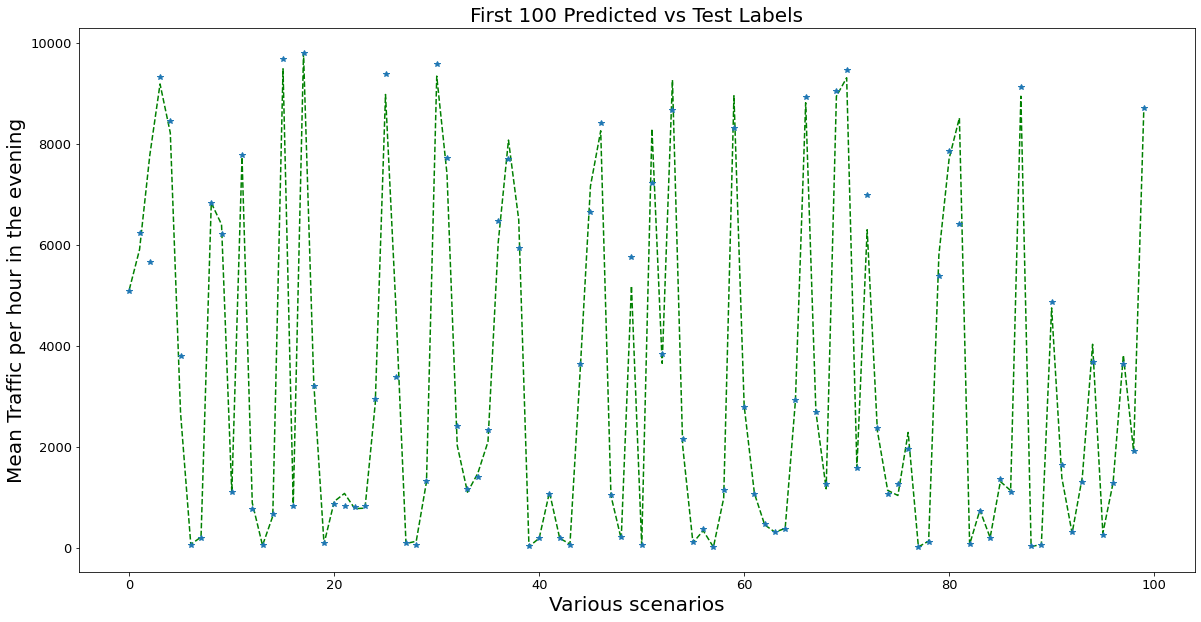

In [ ]:
#x-axis for first 100 numbers
x=[]
for i in range(100):
  x.append(i)

fig, ax = plt.subplots(figsize=(20,10)) 
plt.title("First 100 Predicted vs Test Labels",fontdict={"fontsize":20})

plt.xlabel("Various scenarios",fontdict={"fontsize":20})
plt.ylabel("Mean Traffic per hour in the evening",fontdict={"fontsize":20})

plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 

#first 100 predictions and test labels plot
plt.plot(x,predictions[:100],'g--', x, test_labels[:100], '*')

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

#Converting from overflowing large/infinite errors to zero
#As only one test label was prediction inf hence removed that.
mape[mape==float('+inf')]=0.0

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.26 %.


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'Data_Model_depth_3.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('Data_Model_depth_3.dot')
graph.write_png('Data_Model_depth_3.png');

# Accuracy of the model: 93.26%
### Calculated the feature importance for each feature and observed that out of 40 only 10 features were contributing for the accuracy of the model. Hence, in future models and trainings other non-contributing features can be dropped.


 

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
#Feature importances in the accuracy of the model
feature_importances

[('number_of_lanes_monitored_for_traffic_volume', 0.76),
 ('number_of_lanes_in_direction_indicated', 0.05),
 ('Functional_classes_Urban: Principal Arterial - Other', 0.04),
 ('longitude', 0.03),
 ('Functional_classes_Rural: Principal Arterial - Interstate', 0.03),
 ('latitude', 0.02),
 ('Functional_classes_Urban: Principal Arterial - Interstate', 0.02),
 ('month_of_data', 0.01),
 ('day_of_week_1', 0.01),
 ('station_group_8', 0.01),
 ('method_of_data_retrieval_name', 0.0),
 ('national_highway_system', 0.0),
 ('Travel_direction_East', 0.0),
 ('Travel_direction_North', 0.0),
 ('Travel_direction_South', 0.0),
 ('Travel_direction_West', 0.0),
 ('Functional_classes_Rural: Major Collector', 0.0),
 ('Functional_classes_Rural: Minor Arterial', 0.0),
 ('Functional_classes_Rural: Minor Collector', 0.0),
 ('Functional_classes_Rural: Principal Arterial - Other', 0.0),
 ('Functional_classes_Urban: Minor Arterial', 0.0),
 ('Functional_classes_Urban: Principal Arterial - Other Freeways or Expressways'

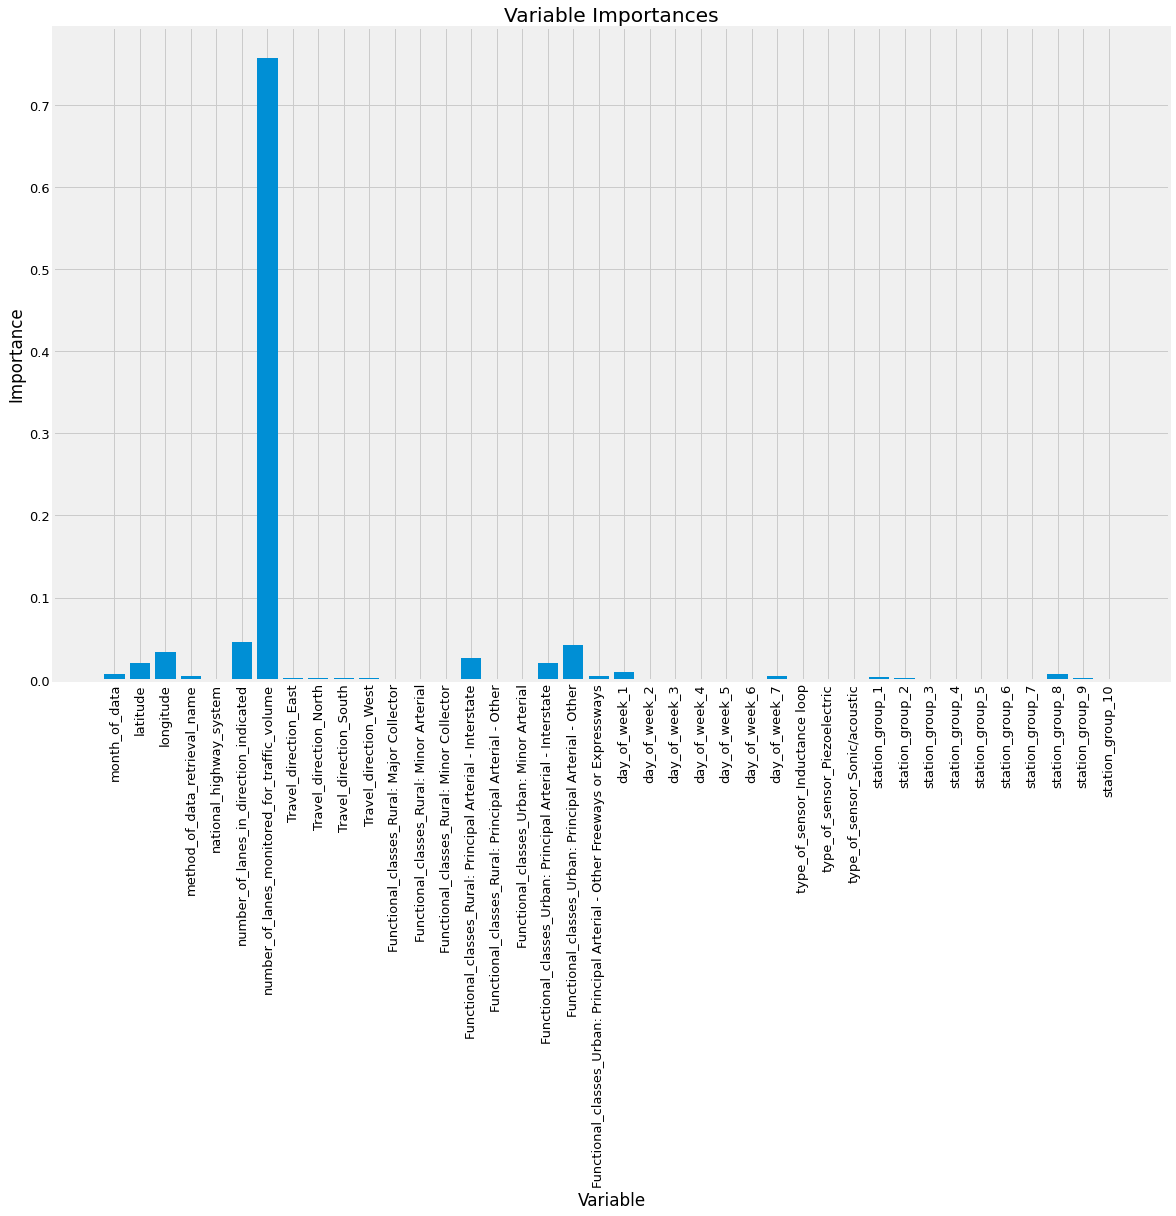

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(20, 12)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

#save feature importance graph
plt.savefig('Feature Importance Graph.png', bbox_inches='tight', pad_inches=0.0)

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Most important features were: (Feature importance out of 1)
Number of lanes monitored for traffic volume (0.76), number of lanes in direction indicated (0.05), Functional class_Urban: Principal Arterial – Other (0.04), longitude (0.03), Functional class_Rural: Principal Arterial – Interstate (0.03), latitude (0.02), Functional class_Urban: Principal Arterial – Interstate (0.02),  month (0.01), day of week Monday (0.01) and station group 8 (0.01).

---



# **Importance of the above Evening Traffic Prediction Model:**

This model can be used for any of the fips state code as desired by the trainer. As the data set contained 7.1M rows which couldn’t be trained completely on my system configurations hence I chose to build it for only a particular state of US. 

A user have to enter certain details of his travel route, station ids, day & month of travel and the geographical coordinate of that area and in turn the model will return him the traffic conditions in evening for the same with an accuracy of 93.26%. So that he can accordingly revise his travel details as per his/her interests. 

---


